# Understanding superheroes' gender




<div class="alert alert-success">
<b>About Dataset</b>

<u>Context</u>

Superheroes have been in popular culture for a long time, and now more than ever. Since its creation, superheroes have not been very diverse, but this is changing rapidly. This dataset aims to provide an overview of heroes and their physical and power characteristics, helping curious people to identify trends and patterns. In this case, we want to understand how physical attributes and powers define superheroes' gender (Male, Female).

<u>Content</u>
    
The columns included in the dataset are: Id,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient.

Column names are self-explanatory. Physical attributes are numerical or categorical, while superpowers are dummy (Onehot) variables.
    
 <u>Inspiration</u>

What are the characteristics of your favorite superheroes? Are these characteristics affecting superheroes' gender? Let's put some light on this important business question.

 <u>URL</u>

https://raw.githubusercontent.com/jnin/information-systems/main/data/superheroes.csv
    
</div>

<div class="alert alert-info"><b>Task</b>
    
To this aim, load the dataset, understand the columns' meaning, preprocess it, create a non-linear classifier, preferably a neural network using sci-kit learn or a specialized library (keras, pytorch, ...), and finally use Lime to build up an explanation about the relationship between gender and the superheroes characteristics (physical and superpowers).
       
</div>

</div>

## Business Case:


We are researching gender roles and diversity in movies and TV shows. We are conducting an 'experiment' to discover whether the diversity and gender neutrality of abilities / characteristics / features has led to a full blend of diversity and therefore genders are no longer able to be recognised by even a complex machine learning algorithm.
If the machine learning model is still able to identify genders with relatively high metrics, we would like to find out what these features are that are still being associated with each gender.




# Preprocessing steps

In [1]:
# Import necessary libraries and set the output to pandas

import pandas as pd
from sklearn import set_config
import numpy as np
import seaborn as sns

set_config(transform_output="pandas")

In [2]:
# Load the data from the URL

df = pd.read_csv('https://raw.githubusercontent.com/jnin/information-systems/main/data/superheroes.csv', index_col=0)
df

name  Gender Eye color               Race        Hair color  \
0             A-Bomb    Male    yellow              Human           No Hair   
1         Abe Sapien    Male      blue      Icthyo Sapien           No Hair   
2           Abin Sur    Male      blue            Ungaran           No Hair   
3        Abomination    Male     green  Human / Radiation           No Hair   
4            Abraxas    Male      blue      Cosmic Entity             Black   
..               ...     ...       ...                ...               ...   
655  Yellowjacket II  Female      blue              Human  Strawberry Blond   
656             Ymir    Male     white        Frost Giant           No Hair   
657             Yoda    Male     brown     Yoda's species             White   
658          Zatanna  Female      blue              Human             Black   
659             Zoom    Male       red                  -             Brown   

     Height          Publisher Skin color Alignment  Weight  ...  \
0     203.0      Marvel Comics          -      good   441.0  ...   
1     191.0  Dark Horse Comics       blue      good    65.0  ...   
2     185.0          DC Comics        red      good    90.0  ...   
3     203.0      Marvel Comics          -       bad   441.0  ...   
4     -99.0      Marvel Comics          -       bad   -99.0  ...   
..      ...                ...        ...       ...     ...  ...   
655   165.0      Marvel Comics          -      good    52.0  ...   
656   304.8      Marvel Comics      white      good   -99.0  ...   
657    66.0       George Lucas      green      good    17.0  ...   
658   170.0          DC Comics          -      good    57.0  ...   
659   185.0          DC Comics          -       bad    81.0  ...   

     Web Creation  Reality Warping  Odin Force  Symbiote Costume  Speed Force  \
0           False            False       False             False        False   
1           False            False       False             False        False   
2           False            False       False             False        False   
3           False            False       False             False        False   
4           False            False       False             False        False   
..            ...              ...         ...               ...          ...   
655         False            False       False             False        False   
656         False            False       False             False        False   
657         False            False       False             False        False   
658         False            False       False             False        False   
659         False            False       False             False        False   

     Phoenix Force  Molecular Dissipation  Vision - Cryo  Omnipresent  \
0            False                  False          False        False   
1            False                  False          False        False   
2            False                  False          False        False   
3            False                  False          False        False   
4            False                  False          False        False   
..             ...                    ...            ...          ...   
655          False                  False          False        False   
656          False                  False          False        False   
657          False                  False          False        False   
658          False                  False          False        False   
659          False                  False          False        False   

     Omniscient  
0         False  
1         False  
2         False  
3         False  
4         False  
..          ...  
655       False  
656       False  
657       False  
658       False  
659       False  

[660 rows x 177 columns]

The data set has been successfully loaded.

## Data Overview

In the first section, we take a quick look at different parts of the data to understand its general features before we start cleaning and preprocessing it in more detail.

In [3]:
# Check for missing values in each column and summarize them
missing_values = df.isnull().sum()

# Check the data types of each column to ensure they are appropriate for the data they contain
data_types = df.dtypes

# Check for and count duplicate rows in the DataFrame
duplicate_rows = df.duplicated().sum()

# Compile the findings into a summary dictionary for a comprehensive overview of anomalies in the dataset
anomalies_summary = {
    'missing_values': missing_values,  # Contains the count of missing values per column
    'data_types': data_types,          # Contains the data type information per column
    'duplicate_rows': duplicate_rows   # Contains the total count of duplicate rows
}

# Output the anomalies summary for review
print(anomalies_summary)

# remove duplicate rows because we don't want duplicates in our dataset
df = df.drop_duplicates()

# check again duplicate rows
duplicate_rows = df.duplicated().sum()

{'missing_values': name                     0
Gender                   0
Eye color                0
Race                     0
Hair color               0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 177, dtype: int64, 'data_types': name                     object
Gender                   object
Eye color                object
Race                     object
Hair color               object
                          ...  
Phoenix Force              bool
Molecular Dissipation      bool
Vision - Cryo              bool
Omnipresent                bool
Omniscient                 bool
Length: 177, dtype: object, 'duplicate_rows': 0}


In [4]:
# Getting the row and column count
rows, columns = df.shape

print(f"Rows: {rows}, Columns: {columns}")

# Getting the names of the columns of the dataset
column_names_list = df.columns.tolist()
print(column_names_list)

Rows: 660, Columns: 177
['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight', 'Agility', 'Accelerated Healing', 'Lantern Power Ring', 'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth', 'Energy Absorption', 'Flight', 'Danger Sense', 'Underwater breathing', 'Marksmanship', 'Weapons Master', 'Power Augmentation', 'Animal Attributes', 'Longevity', 'Intelligence', 'Super Strength', 'Cryokinesis', 'Telepathy', 'Energy Armor', 'Energy Blasts', 'Duplication', 'Size Changing', 'Density Control', 'Stamina', 'Astral Travel', 'Audio Control', 'Dexterity', 'Omnitrix', 'Super Speed', 'Possession', 'Animal Oriented Powers', 'Weapon-based Powers', 'Electrokinesis', 'Darkforce Manipulation', 'Death Touch', 'Teleportation', 'Enhanced Senses', 'Telekinesis', 'Energy Beams', 'Magic', 'Hyperkinesis', 'Jump', 'Clairvoyance', 'Dimensional Travel', 'Power Sense', 'Shapeshifting', 'Peak Human Condition', 'Immortality', 'Camouflage', 

In [5]:
# Preview the first few rows of the dataset to get an initial understanding of the data
print(df.head())

          name Gender Eye color               Race Hair color  Height  \
0       A-Bomb   Male    yellow              Human    No Hair   203.0   
1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   191.0   
2     Abin Sur   Male      blue            Ungaran    No Hair   185.0   
3  Abomination   Male     green  Human / Radiation    No Hair   203.0   
4      Abraxas   Male      blue      Cosmic Entity      Black   -99.0   

           Publisher Skin color Alignment  Weight  ...  Web Creation  \
0      Marvel Comics          -      good   441.0  ...         False   
1  Dark Horse Comics       blue      good    65.0  ...         False   
2          DC Comics        red      good    90.0  ...         False   
3      Marvel Comics          -       bad   441.0  ...         False   
4      Marvel Comics          -       bad   -99.0  ...         False   

   Reality Warping  Odin Force  Symbiote Costume  Speed Force  Phoenix Force  \
0            False       False             False

We find that the feature 'Unnamed: 0' is the name that Pandas assigns to the index when it is not explicitly named. Therefore, we do not have to remove it; it will be automatically handled by Pandas.
However, we are thinking that the feature 'Publisher' may not contribute to the model. We we will evaluate this.


In [6]:
# Analysing the feature "Publisher"
print(df['Publisher'].value_counts())

Marvel Comics        341
DC Comics            196
Dark Horse Comics     18
NBC - Heroes          18
Image Comics          14
George Lucas          13
Star Trek              6
SyFy                   5
Team Epic TV           5
Shueisha               4
IDW Publishing         4
ABC Studios            4
Icon Comics            4
HarperCollins          3
Wildstorm              3
South Park             1
Universal Studios      1
Hanna-Barbera          1
Sony Pictures          1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64


As expected, this feature does t seem tot give predicting power to our model and may produce unnecessary noise. We therefore choose to remove it.

In [7]:
# Dropping "Publisher"
df = df.drop(['Publisher'], axis=1) 

## Summary Statistics: Categorical Columns

In [8]:
# List to hold names of categorical columns
categorical_columns = []

# Check each column's data type
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        categorical_columns.append(column)

print("Categorical columns:", categorical_columns)

Categorical columns: ['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Skin color', 'Alignment']


It seems like "Height" and "Weight" have negative values which seem erroneous given that these attributes cannot be negative. This could be a mistakes in data entry or a completely useless values.

In [9]:
# Counting the number of rows with negative values in the 'Height' column
negative_value_count_height = df[df["Height"] < 0].shape[0]
print(f"Number of rows with negative values in column 'Height': {negative_value_count_height}")

# Counting the number of rows with negative values in the 'Weight' column
negative_value_count_weight = df[df["Weight"] < 0].shape[0]
print(f"Number of rows with negative values in column 'Weight': {negative_value_count_weight}")

Number of rows with negative values in column 'Height': 170
Number of rows with negative values in column 'Weight': 190


In order to identify whether these values are a mistake in data entry, we can take some examples of negative large values and google their character. If the absolute value of the negative value associated with the character's height/weight is reasonable, we conclude that this is the right course of action.

In [10]:
# Finding the index of the row with the maximum height
min_height_index = df['Height'].idxmin()

# Using the index to find the character's name
shortest_character_name = df.loc[min_height_index, 'name']

print(f"The character with the minimum height is: {shortest_character_name}")

The character with the minimum height is: Abraxas


Considering that Abraxas is a huge character and its height is negative, we can confidently say that we need to transform the values to absolute. We hypothesise that there is simply a data input mistake.

In [11]:
# Converting the negative values in "Height" and "Weight" into absolute values
df.loc[df["Height"] < 0, "Height"] = df["Height"].abs()
df.loc[df["Weight"] < 0, "Weight"] = df["Weight"].abs()

# Getting summary statistics of numerical columns again
print(df.describe())

           Height      Weight
count  660.000000  658.000000
mean   164.509848  109.420973
std     64.915590   90.039636
min     15.200000    2.000000
25%     99.000000   72.000000
50%    178.000000   99.000000
75%    188.000000   99.000000
max    975.000000  900.000000


## Removing the rows where the Gender column has "-" 

In [12]:
# Removing rows where 'Gender' is "-"
superheroes = df[df['Gender'] != "-"]

print(superheroes)

                name  Gender Eye color               Race        Hair color  \
0             A-Bomb    Male    yellow              Human           No Hair   
1         Abe Sapien    Male      blue      Icthyo Sapien           No Hair   
2           Abin Sur    Male      blue            Ungaran           No Hair   
3        Abomination    Male     green  Human / Radiation           No Hair   
4            Abraxas    Male      blue      Cosmic Entity             Black   
..               ...     ...       ...                ...               ...   
655  Yellowjacket II  Female      blue              Human  Strawberry Blond   
656             Ymir    Male     white        Frost Giant           No Hair   
657             Yoda    Male     brown     Yoda's species             White   
658          Zatanna  Female      blue              Human             Black   
659             Zoom    Male       red                  -             Brown   

     Height Skin color Alignment  Weight  Agility  

Futheremore, we are now removing the feature "name" because it is uncorrelated with the target variable. (Just like 'publisher' and 'Unnamed'). We used it to identify and explore other variables and can now remove it to create our model with less noise.

In [13]:
# Removing name because unnecssary
df_noName = df.drop(['name'], axis=1) 

## Removing the rows where categorical values have "-" 

Counting how many missing values there are:

In [14]:
# list of categorical columns in the dataset
categorical_columns = df_noName.select_dtypes(include=['object']).columns.tolist()

categorical_columns
# identify number of '-' in each column
for column in categorical_columns:
    print(f"Number of '-' in {column}: {df_noName[df_noName[column] == '-'].shape[0]}")

Number of '-' in Gender: 18
Number of '-' in Eye color: 131
Number of '-' in Race: 247
Number of '-' in Hair color: 132
Number of '-' in Skin color: 588
Number of '-' in Alignment: 0


Now we replace all '-' with 'missing' in the features.

In [15]:
# asigning 'missing' to '-'
df_AddCategoryMissing = df_noName.replace('-', 'missing')
# identify number of '-' in each column
for column in categorical_columns:
    print(f"Number of '-' in {column}: {df_AddCategoryMissing[df_AddCategoryMissing[column] == '-'].shape[0]}")

Number of '-' in Gender: 0
Number of '-' in Eye color: 0
Number of '-' in Race: 0
Number of '-' in Hair color: 0
Number of '-' in Skin color: 0
Number of '-' in Alignment: 0


We now use the following code to double check that there are now 'missing' values in the features.

In [16]:
# get the unique category of each variable
for column in categorical_columns:
    print(f"Unique categories in {column}: {df_AddCategoryMissing[column].unique()}")

Unique categories in Gender: ['Male' 'Female' 'missing']
Unique categories in Eye color: ['yellow' 'blue' 'green' 'brown' 'missing' 'red' 'violet' 'white' 'purple'
 'black' 'silver' 'yellow / red' 'grey' 'yellow (without irises)' 'gold'
 'blue / white' 'hazel' 'green / blue' 'white / red' 'indigo' 'amber'
 'yellow / blue' 'bown']
Unique categories in Race: ['Human' 'Icthyo Sapien' 'Ungaran' 'Human / Radiation' 'Cosmic Entity'
 'missing' 'Cyborg' 'Xenomorph XX121' 'Android' 'Vampire' 'Mutant'
 'God / Eternal' 'Symbiote' 'Atlantean' 'Alien' 'Neyaphem' 'New God'
 'Alpha' 'Bizarro' 'Inhuman' 'Metahuman' 'Demon' 'Human / Clone'
 'Human-Kree' 'Dathomirian Zabrak' 'Amazon' 'Human / Cosmic'
 'Human / Altered' 'Kryptonian' 'Kakarantharaian' 'Zen-Whoberian'
 'Strontian' 'Kaiju' 'Saiyan' 'Gorilla' 'Rodian' 'Flora Colossus'
 'Human-Vuldarian' 'Asgardian' 'Demi-God' 'Eternal' 'Gungan' 'Bolovaxian'
 'Animal' 'Czarnian' 'Martian' 'Spartoi' 'Luphomoid' 'Parademon' 'Yautja'
 'Maiar' 'Clone' 'Talokite' 

In [17]:
df = df_AddCategoryMissing

We need to make sure that there are no 'missing' values in the column Gender so that the model can only predict male or female

In [18]:
df = df[df['Gender'] != 'missing']
df

Gender Eye color               Race        Hair color  Height Skin color  \
0      Male    yellow              Human           No Hair   203.0    missing   
1      Male      blue      Icthyo Sapien           No Hair   191.0       blue   
2      Male      blue            Ungaran           No Hair   185.0        red   
3      Male     green  Human / Radiation           No Hair   203.0    missing   
4      Male      blue      Cosmic Entity             Black    99.0    missing   
..      ...       ...                ...               ...     ...        ...   
655  Female      blue              Human  Strawberry Blond   165.0    missing   
656    Male     white        Frost Giant           No Hair   304.8      white   
657    Male     brown     Yoda's species             White    66.0      green   
658  Female      blue              Human             Black   170.0    missing   
659    Male       red            missing             Brown   185.0    missing   

    Alignment  Weight  Agility  Accelerated Healing  ...  Web Creation  \
0        good   441.0    False                 True  ...         False   
1        good    65.0     True                 True  ...         False   
2        good    90.0    False                False  ...         False   
3         bad   441.0    False                 True  ...         False   
4         bad    99.0    False                False  ...         False   
..        ...     ...      ...                  ...  ...           ...   
655      good    52.0    False                False  ...         False   
656      good    99.0    False                False  ...         False   
657      good    17.0     True                False  ...         False   
658      good    57.0    False                False  ...         False   
659       bad    81.0    False                False  ...         False   

     Reality Warping  Odin Force  Symbiote Costume  Speed Force  \
0              False       False             False        False   
1              False       False             False        False   
2              False       False             False        False   
3              False       False             False        False   
4              False       False             False        False   
..               ...         ...               ...          ...   
655            False       False             False        False   
656            False       False             False        False   
657            False       False             False        False   
658            False       False             False        False   
659            False       False             False        False   

     Phoenix Force  Molecular Dissipation  Vision - Cryo  Omnipresent  \
0            False                  False          False        False   
1            False                  False          False        False   
2            False                  False          False        False   
3            False                  False          False        False   
4            False                  False          False        False   
..             ...                    ...            ...          ...   
655          False                  False          False        False   
656          False                  False          False        False   
657          False                  False          False        False   
658          False                  False          False        False   
659          False                  False          False        False   

     Omniscient  
0         False  
1         False  
2         False  
3         False  
4         False  
..          ...  
655       False  
656       False  
657       False  
658       False  
659       False  

[642 rows x 175 columns]

## Checking for missing values

Here we check if there are any missing values that are not associated with this sign: '-' 

In [19]:
missing_values_count = df.isnull().sum()
positive_missing_values_count = missing_values_count[missing_values_count > 0]
positive_missing_values_count

Weight    1
dtype: int64

We see that we have to transform the missing values in weight. We decide to inpute the mean.

In [20]:
# Calculate the mean weight, excluding NaN values
mean_weight = df['Weight'].mean()

# Impute missing values in the 'Weight' column with the mean weight
df['Weight'].fillna(value=mean_weight, inplace=True)

/var/folders/00/r_n6l1n57999hdn7w1qw3nnc0000gn/T/ipykernel_80146/3364188022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'].fillna(value=mean_weight, inplace=True)


## Exploratory Data Analysis

### Numerical Variables
Since the dataset has only two numerical variables, we try to explore two major aspects of the data
1. Their distrubution - using violin plots as they combine the information of both boxplots and histograms
2. Their relationship with each other - to check if there is any trend we can identify that differentiates between male and female genders

#### Violin Plots

/var/folders/00/r_n6l1n57999hdn7w1qw3nnc0000gn/T/ipykernel_80146/92215396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[col], palette=[palette[idx]])


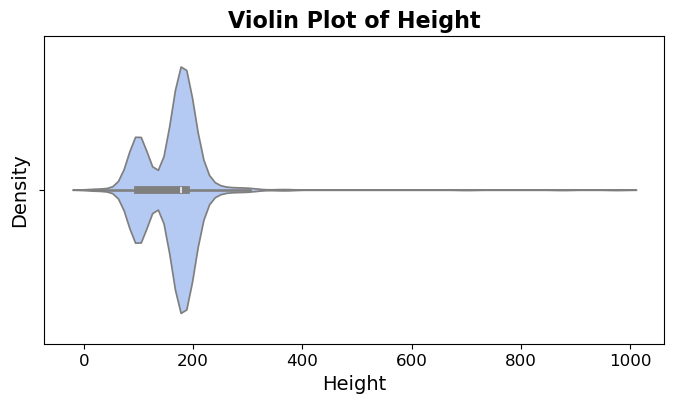

/var/folders/00/r_n6l1n57999hdn7w1qw3nnc0000gn/T/ipykernel_80146/92215396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[col], palette=[palette[idx]])


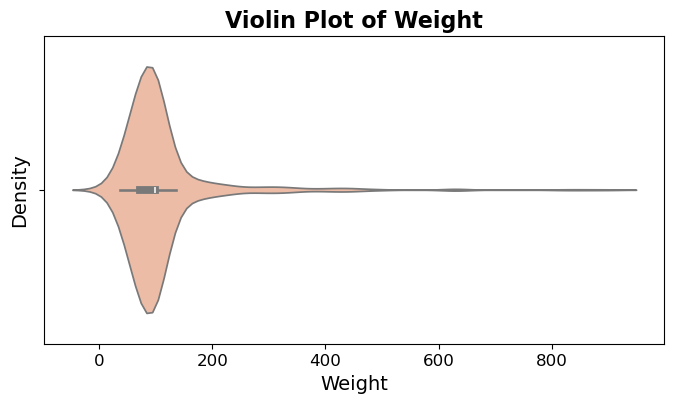

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

df_EDA = df_AddCategoryMissing

# Identifying the numerical variables
numerical_columns = df_EDA.select_dtypes(include=[np.number]).columns

# Choose a color palette
palette = sns.color_palette("coolwarm", len(numerical_columns))

# Create violin plots for each numerical variable
for idx, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 4))  # Customize figure size
    sns.violinplot(x=df[col], palette=[palette[idx]])
    plt.title(f'Violin Plot of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

#### Pairplot

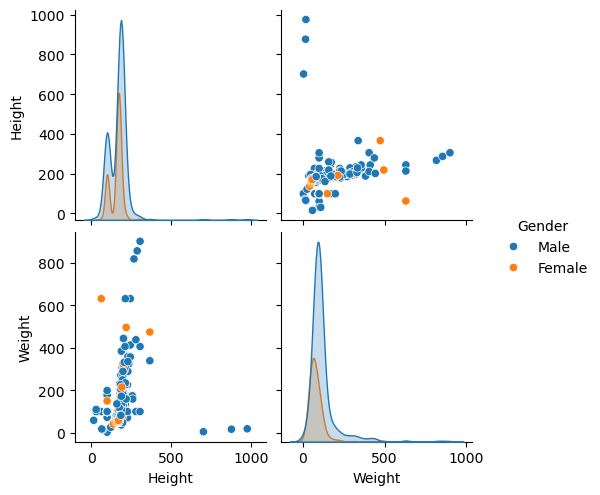

In [22]:
sns.pairplot(df[['Height', 'Weight', 'Gender']], hue='Gender')

The pairplot shows how the relationship between the male and female categories is complex given the significant overlapp in the plots, and the lack of any clear distinction between the categories

#### Categorical Variables

In [23]:
categorical_columns = df_EDA.select_dtypes(include=['object', 'category']).columns

# Initialize an empty dictionary to store the counts and percentage data
tables = {}

# Loop through the categorical columns and calculate counts and percentages
for column in categorical_columns:
    counts = df[column].value_counts(dropna=False)
    percentages = df[column].value_counts(normalize=True, dropna=False) * 100
    tables[column] = pd.DataFrame({
        'Counts': counts, 
        'Percentage': percentages.round(2).astype(str) + '%'
    })

# Display the summary tables for each categorical variable
for variable, table in tables.items():
    print(f"--- Distribution for {variable} ---")
    print(table, "\n")

--- Distribution for Gender ---
        Counts Percentage
Male       464     72.27%
Female     178     27.73% 

--- Distribution for Eye color ---
                         Counts Percentage
blue                        205     31.93%
missing                     124     19.31%
brown                       117     18.22%
green                        71     11.06%
red                          40      6.23%
black                        21      3.27%
yellow                       18       2.8%
white                        15      2.34%
hazel                         6      0.93%
grey                          5      0.78%
purple                        4      0.62%
gold                          3      0.47%
amber                         2      0.31%
violet                        2      0.31%
yellow / blue                 1      0.16%
yellow (without irises)       1      0.16%
indigo                        1      0.16%
yellow / red                  1      0.16%
white / red                   1     

#### Boolean Variables

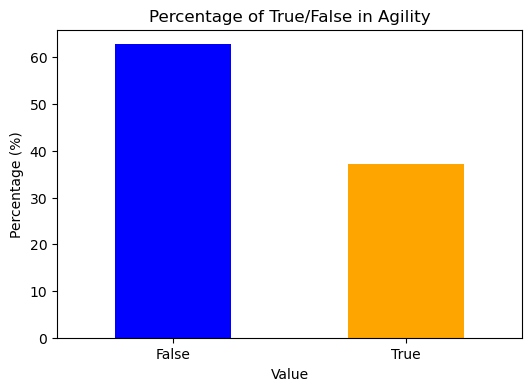

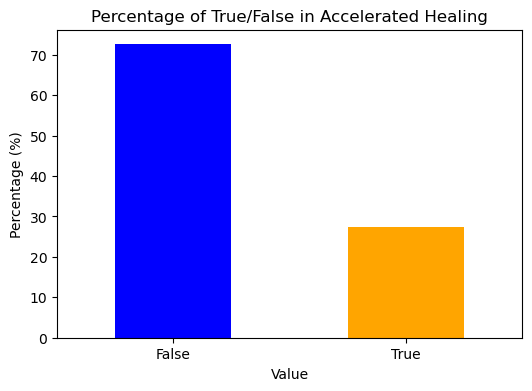

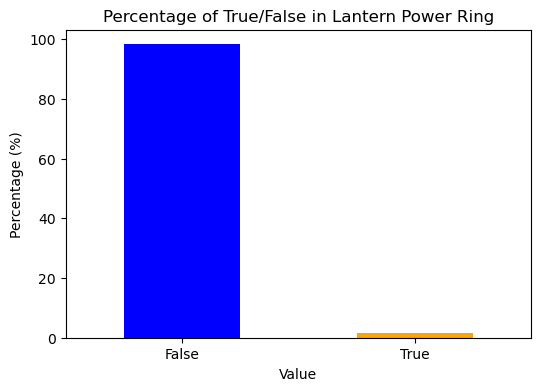

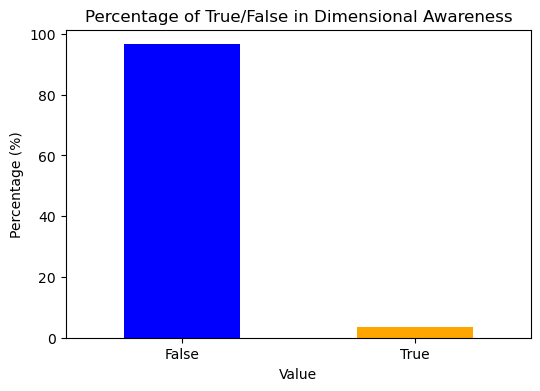

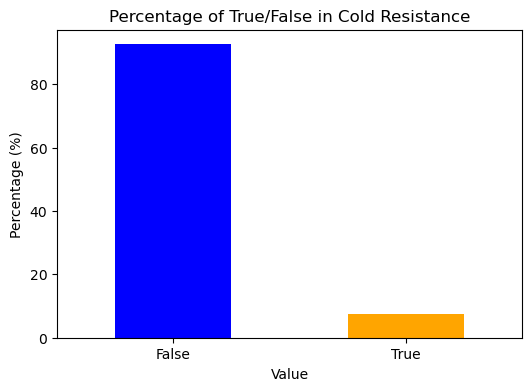

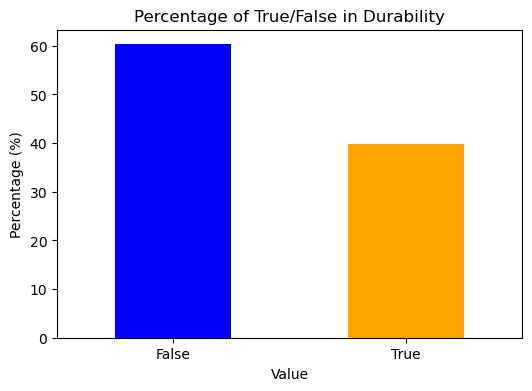

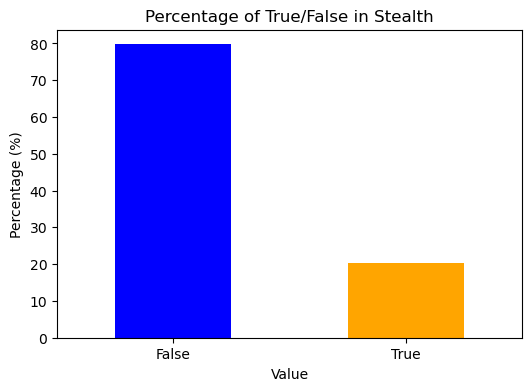

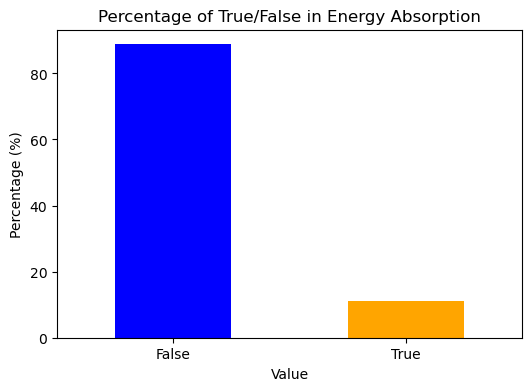

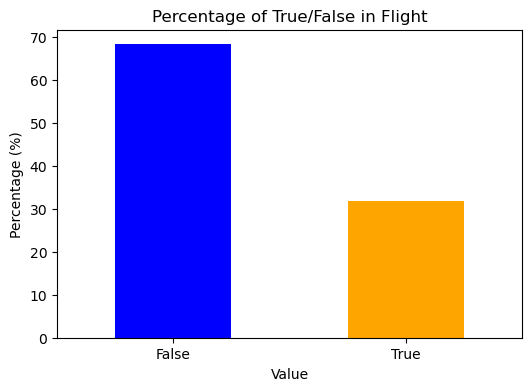

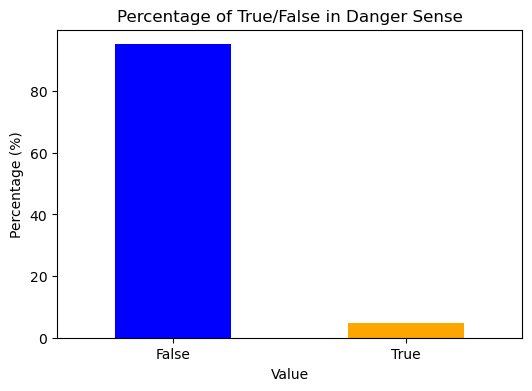

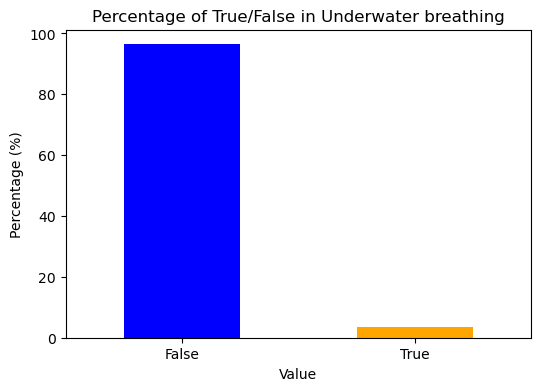

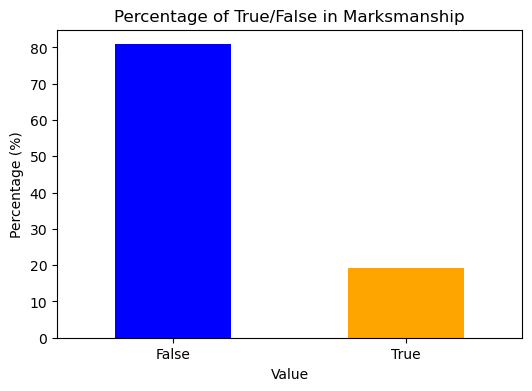

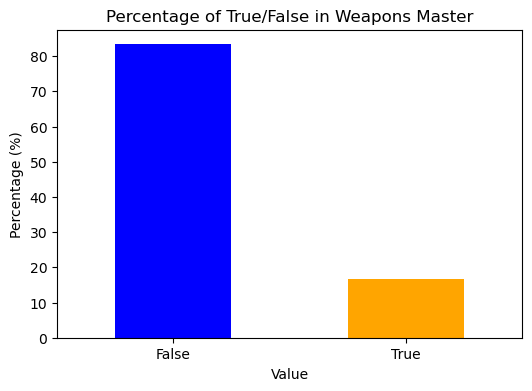

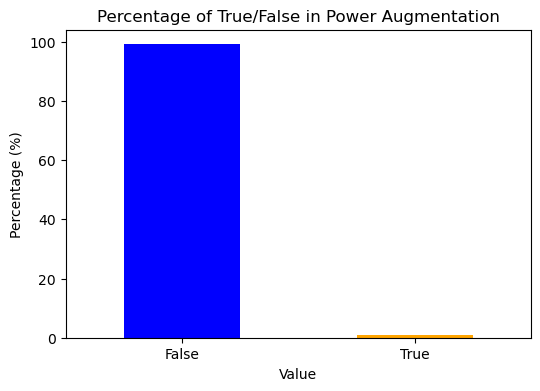

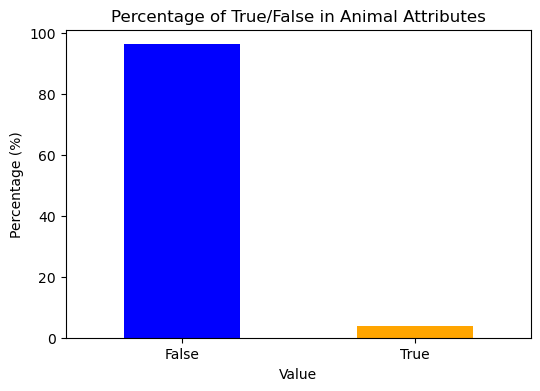

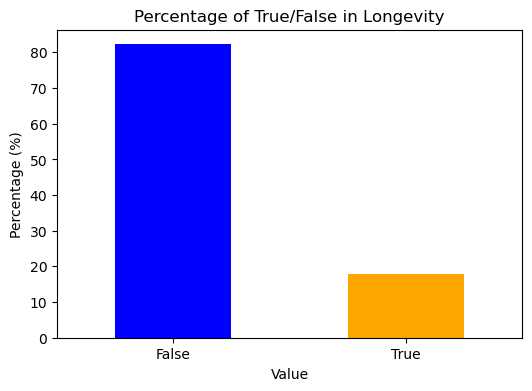

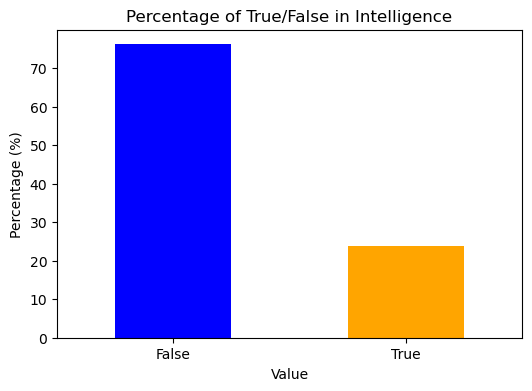

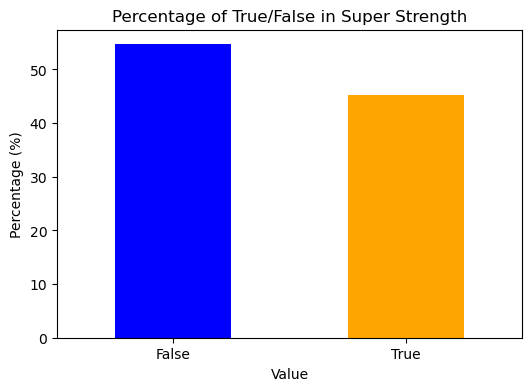

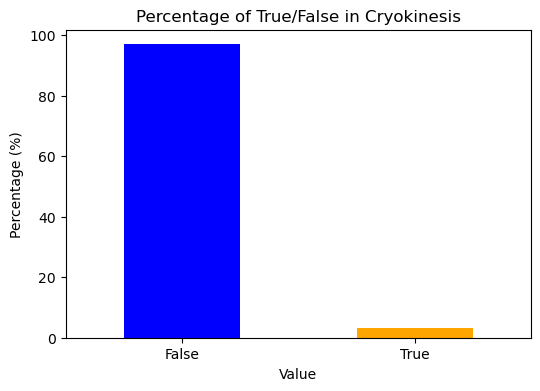

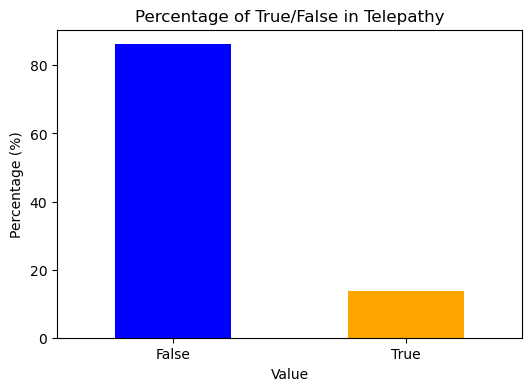

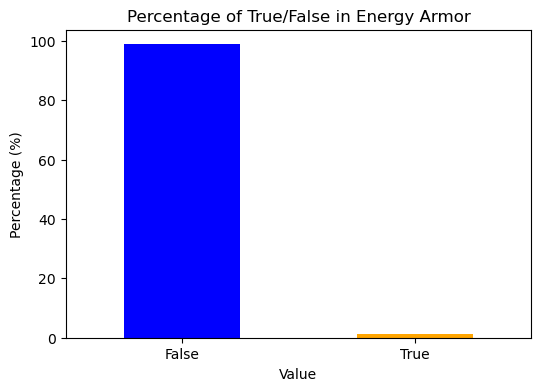

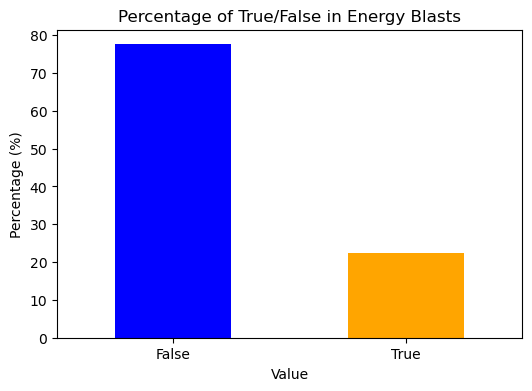

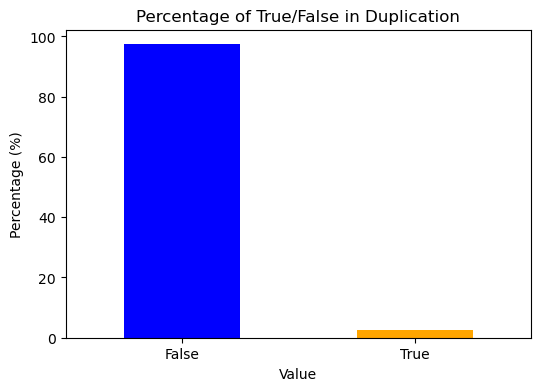

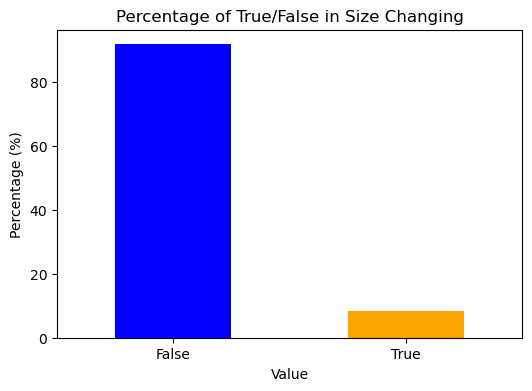

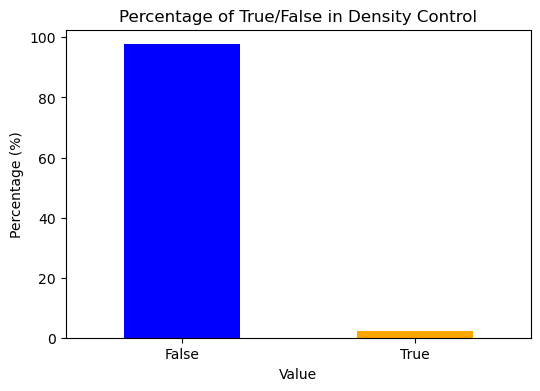

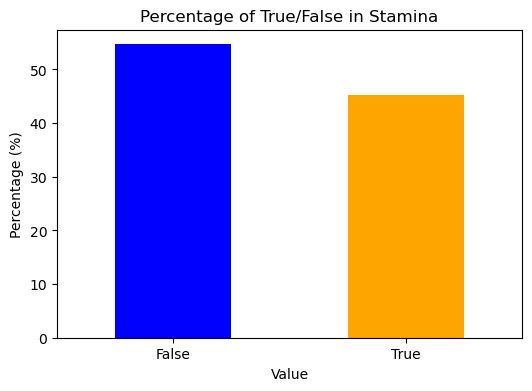

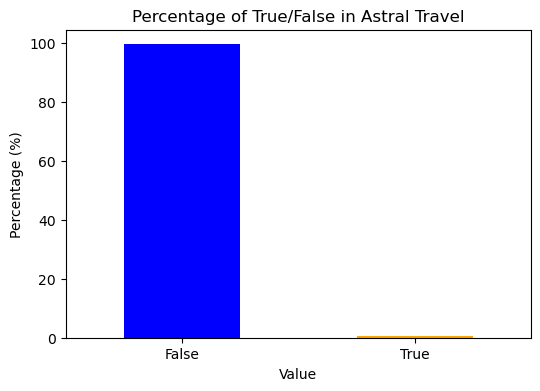

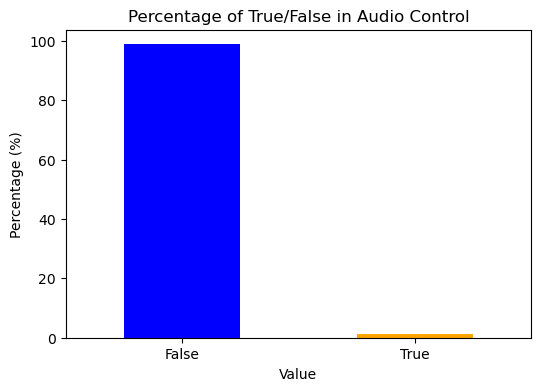

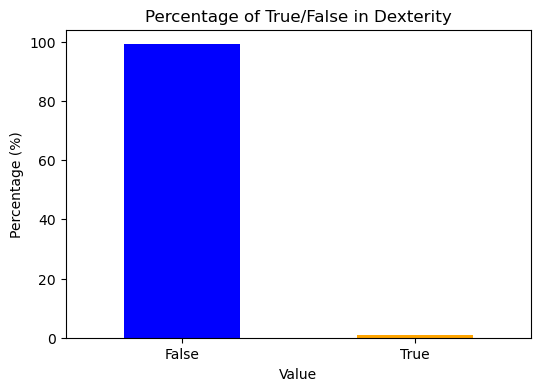

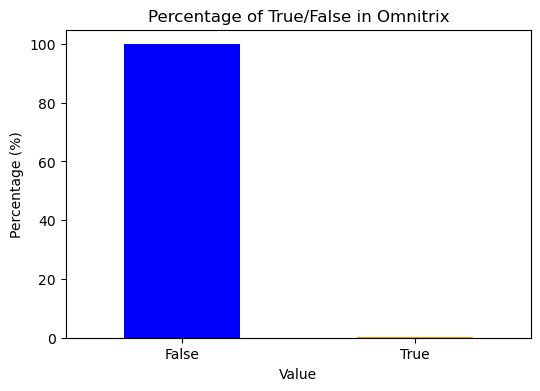

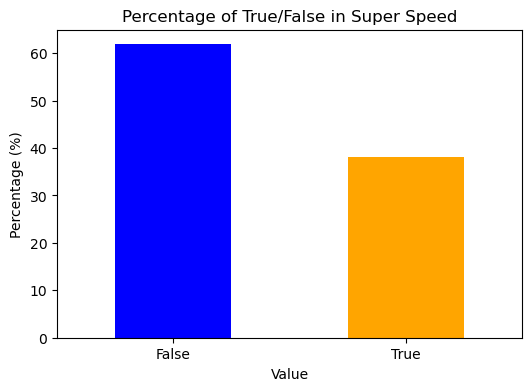

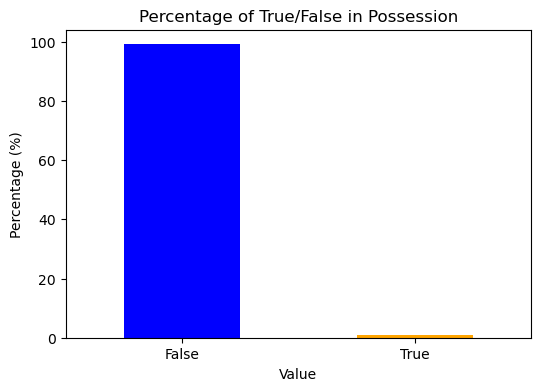

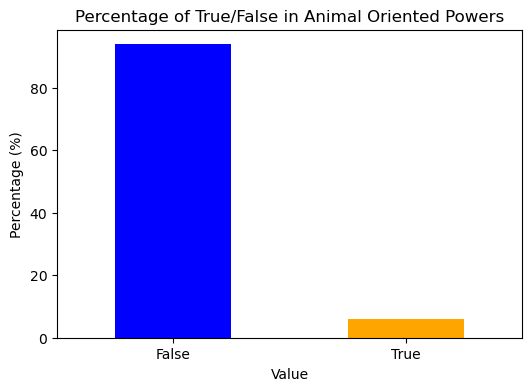

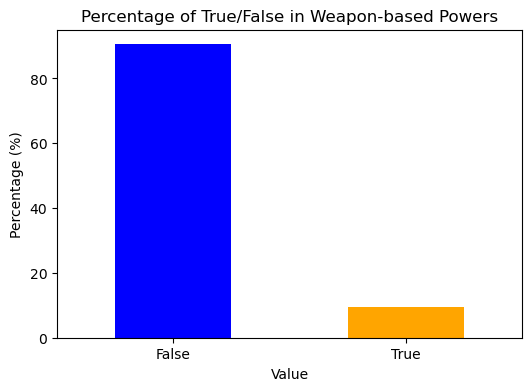

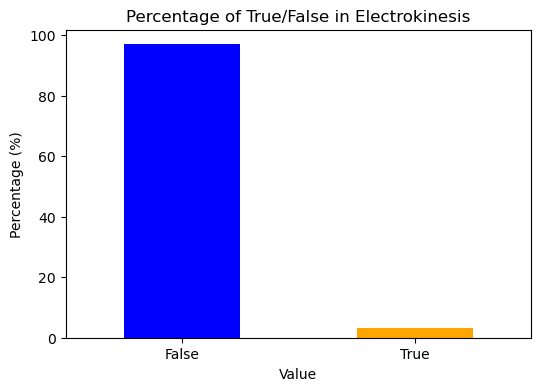

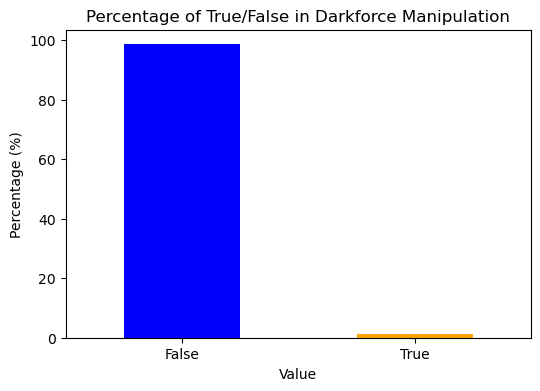

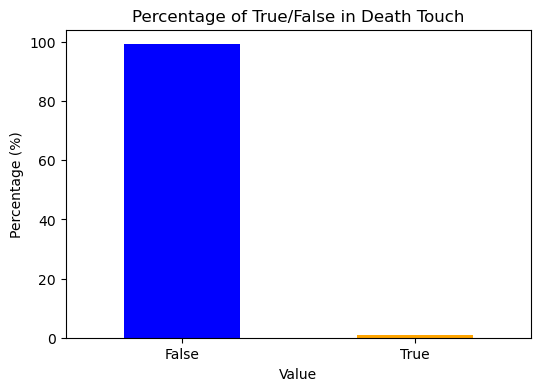

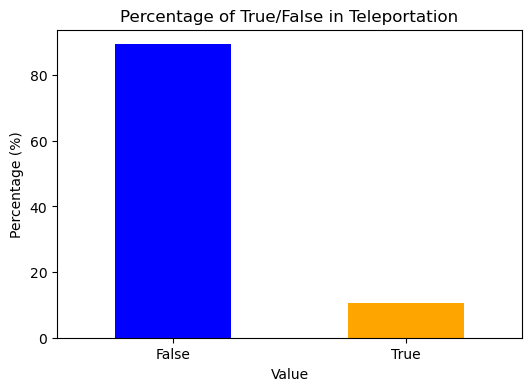

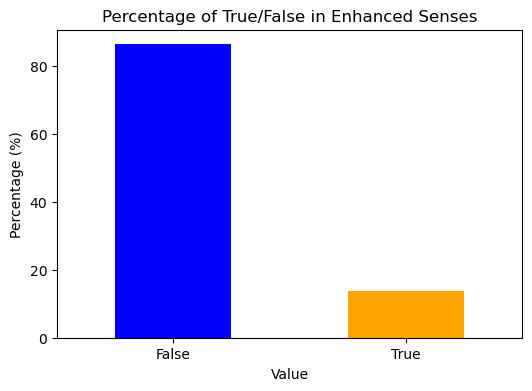

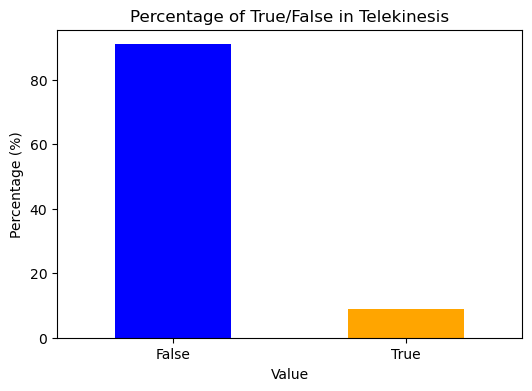

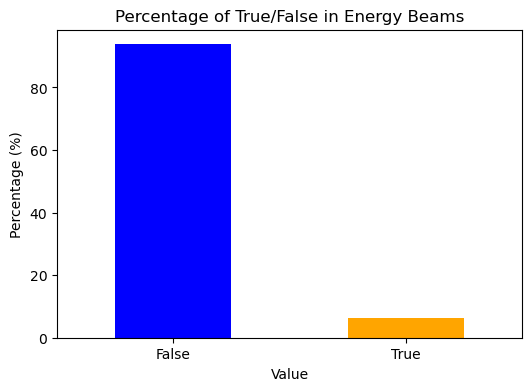

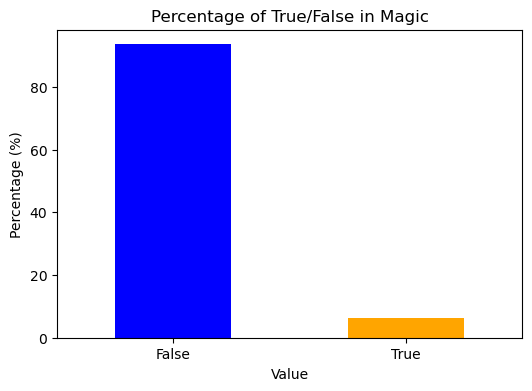

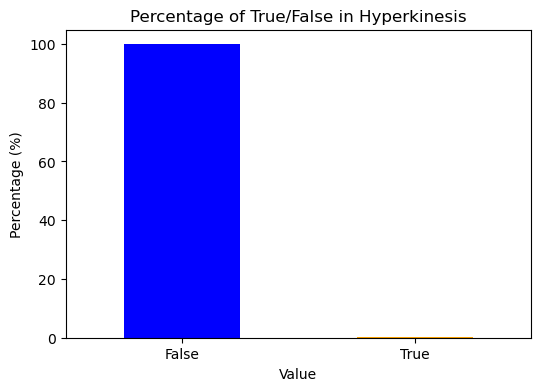

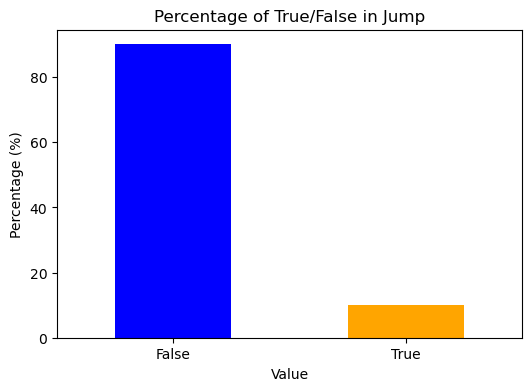

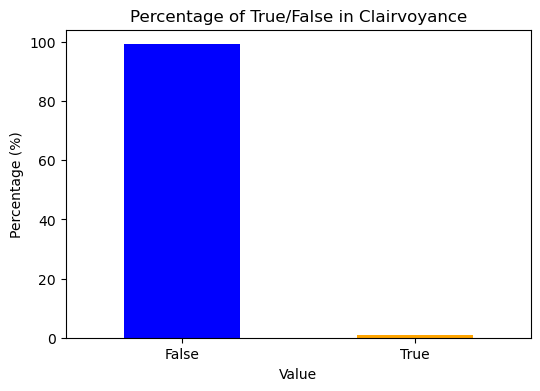

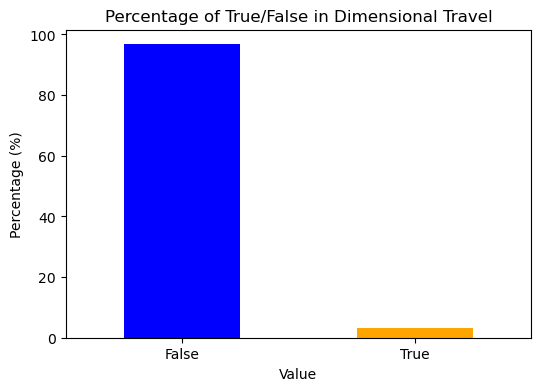

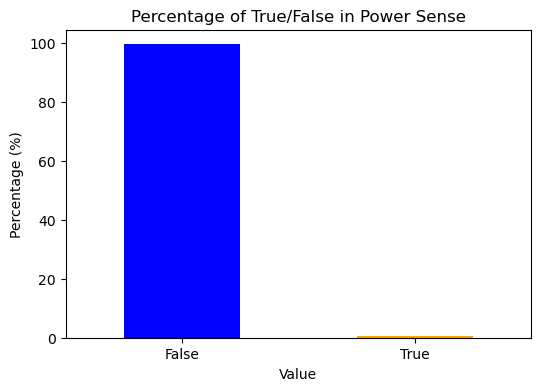

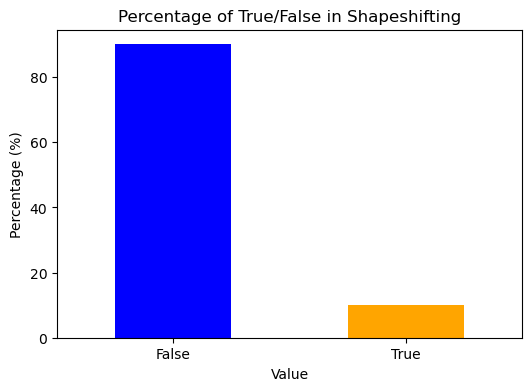

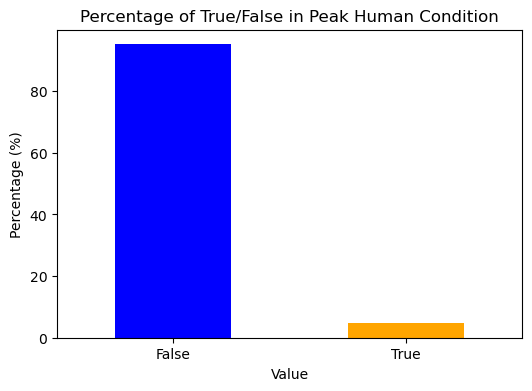

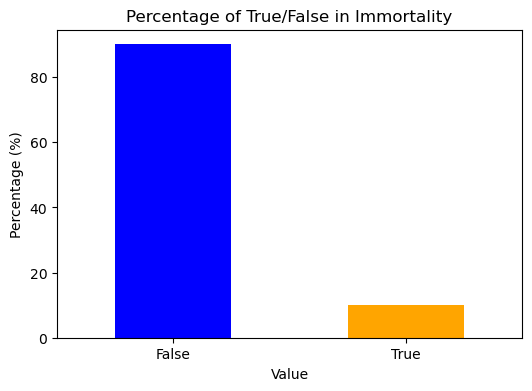

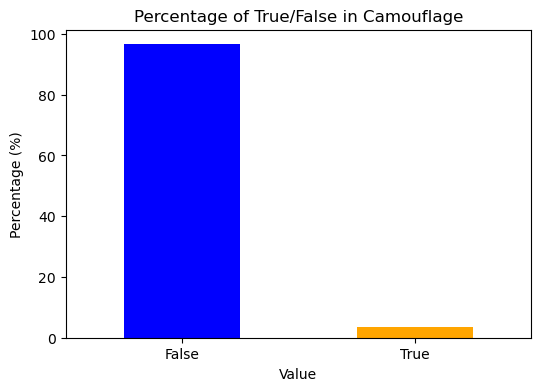

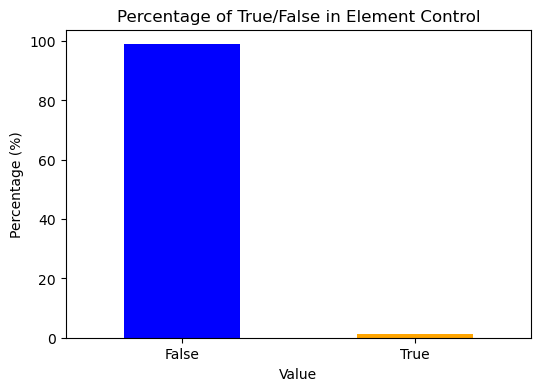

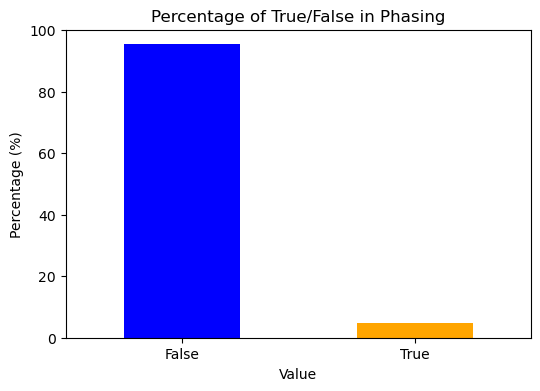

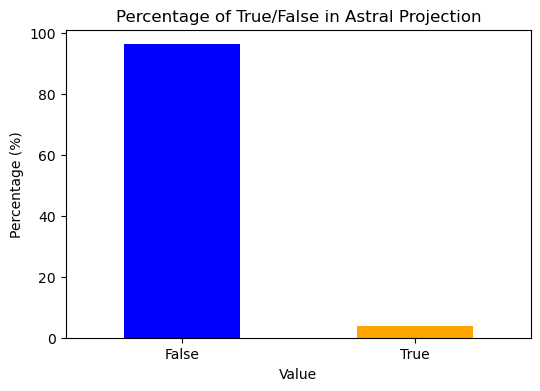

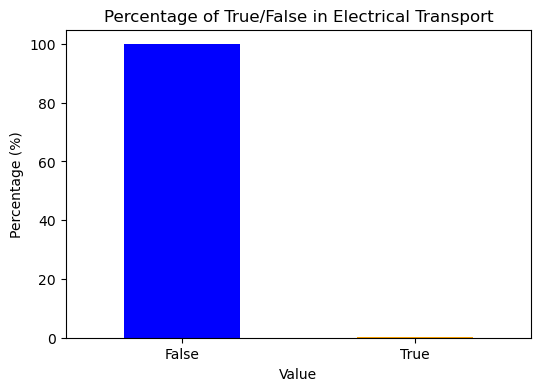

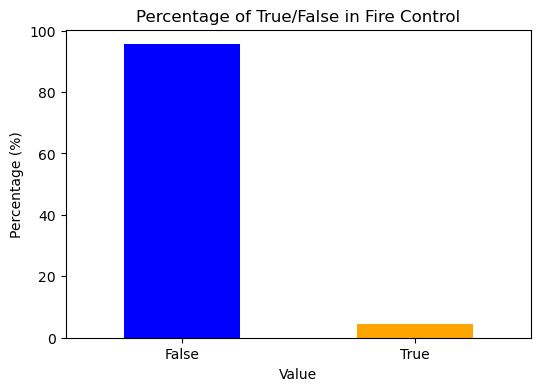

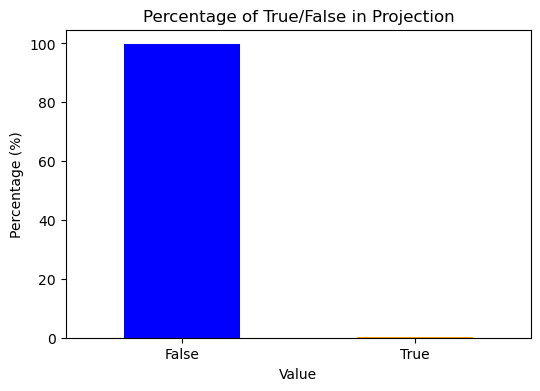

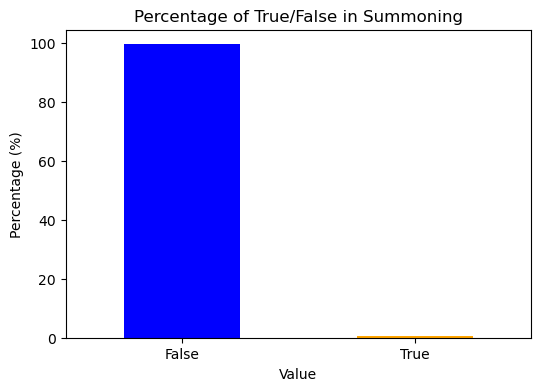

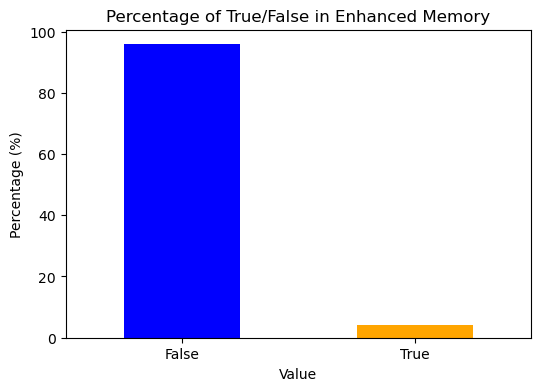

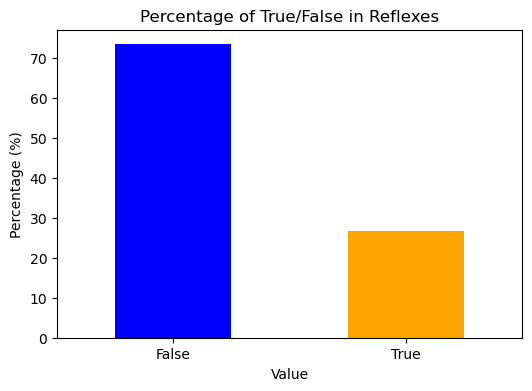

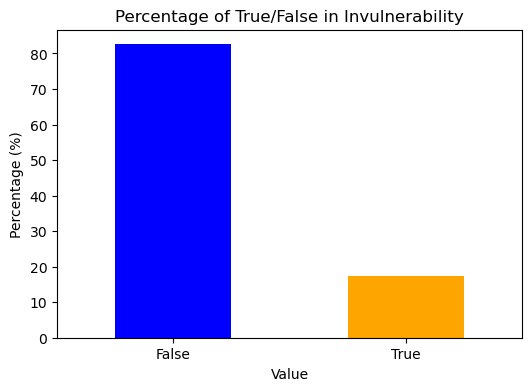

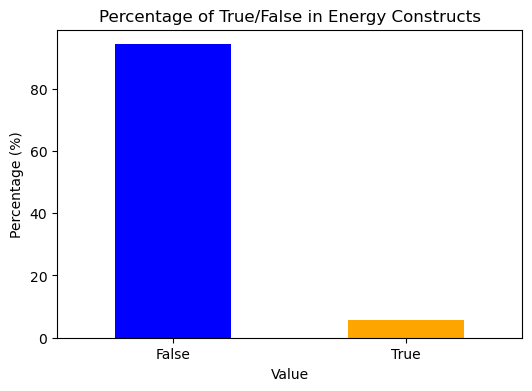

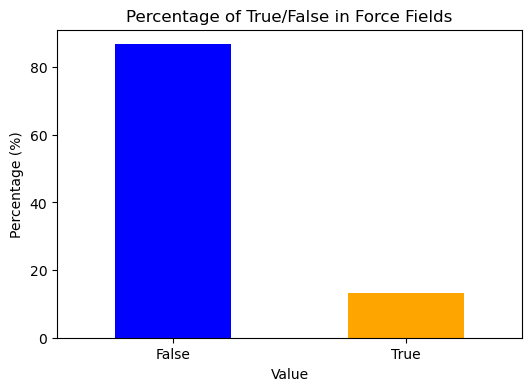

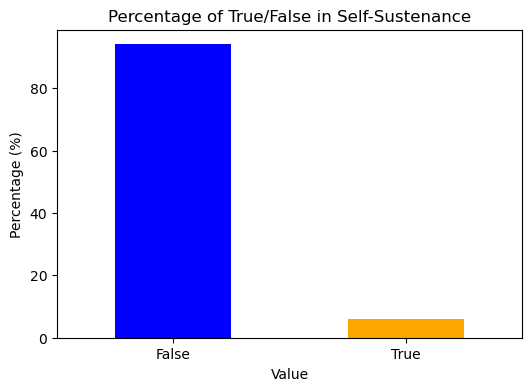

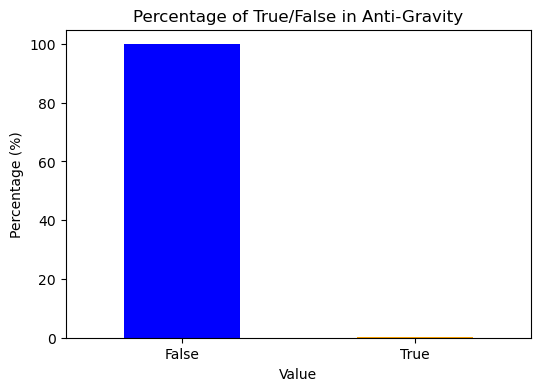

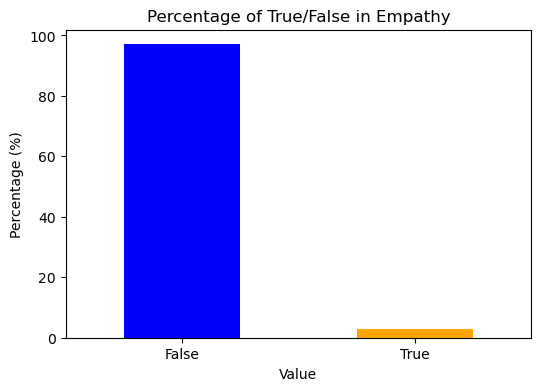

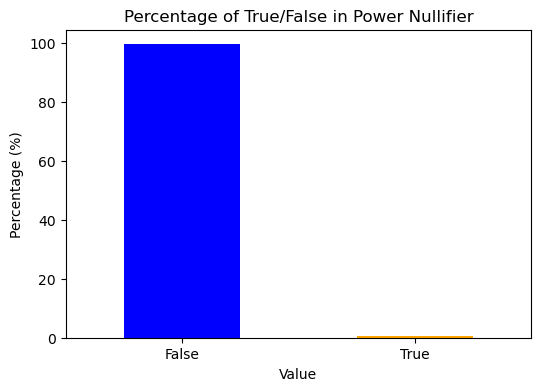

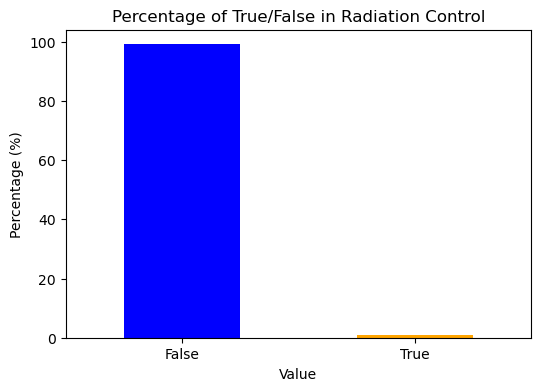

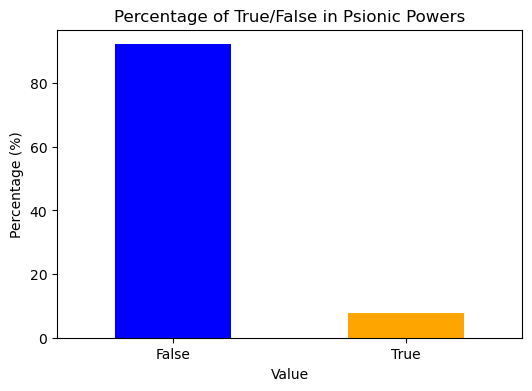

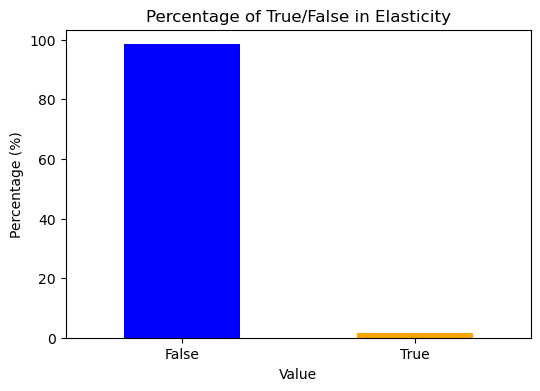

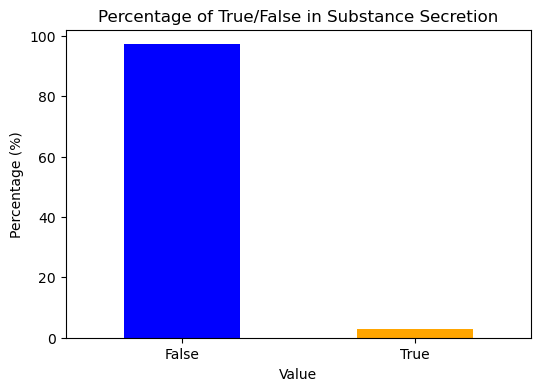

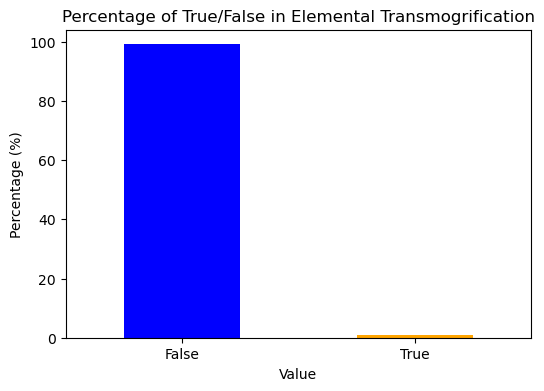

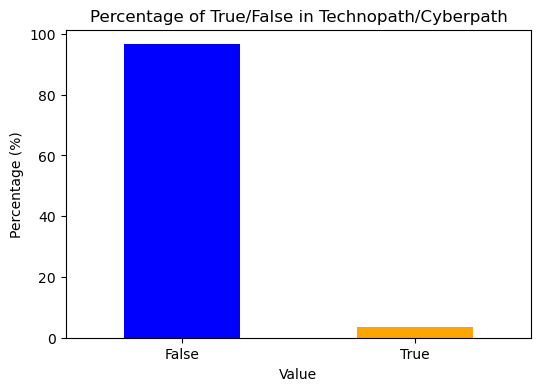

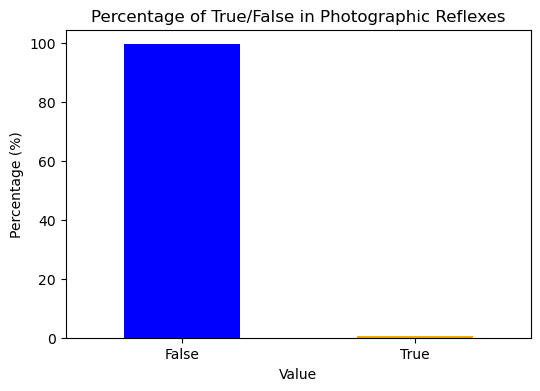

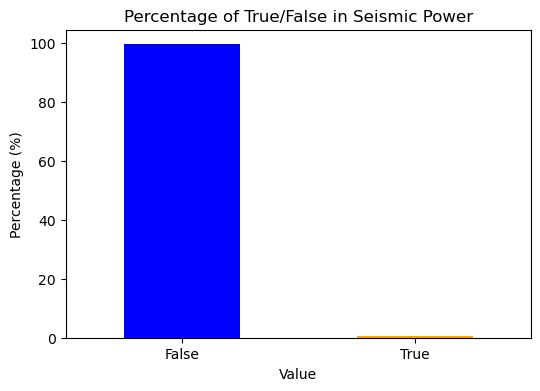

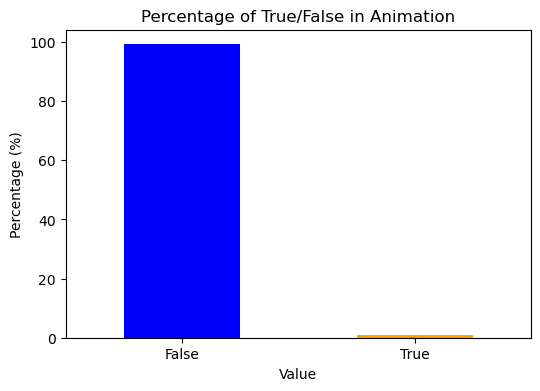

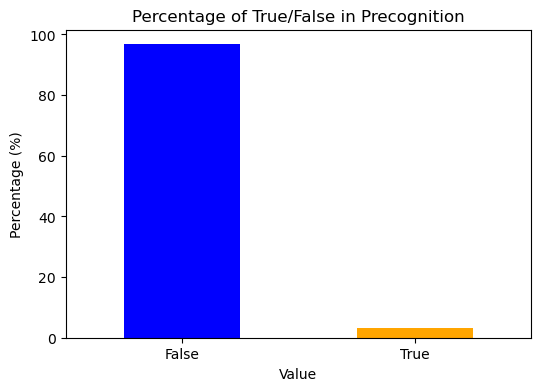

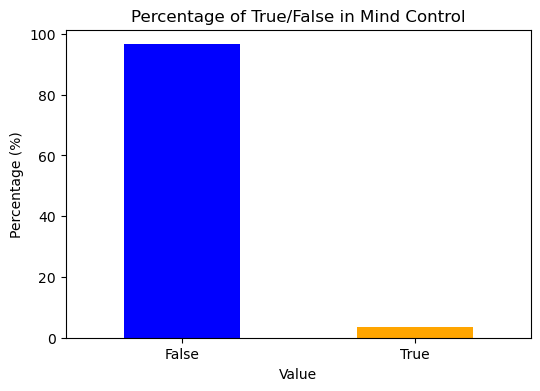

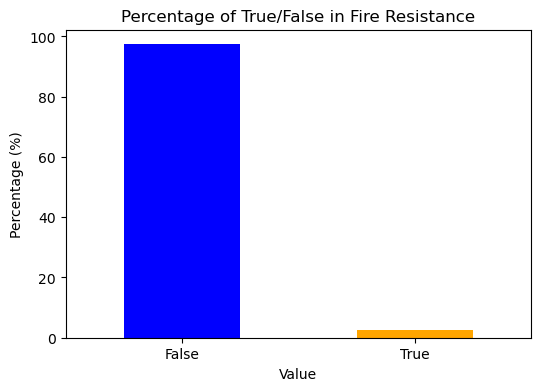

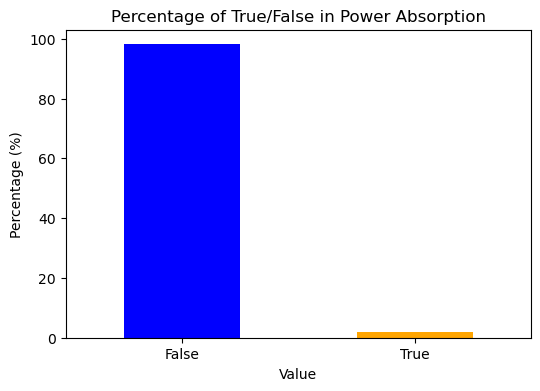

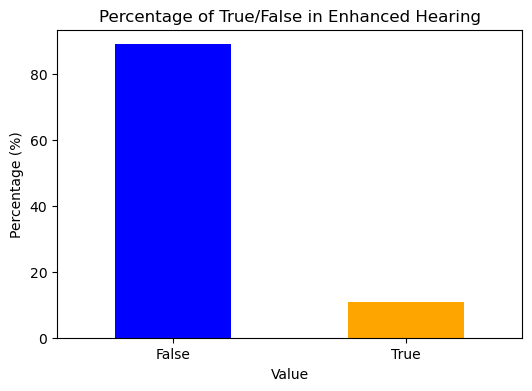

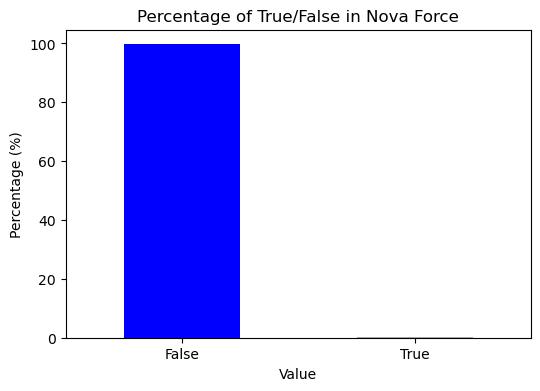

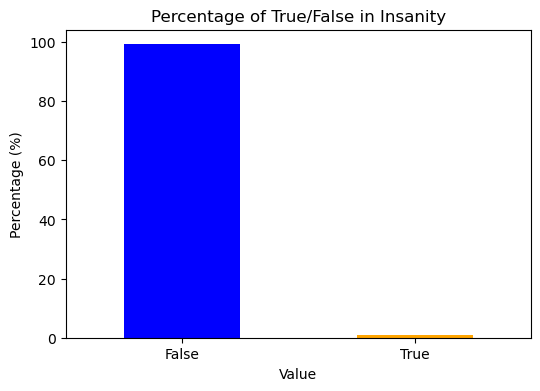

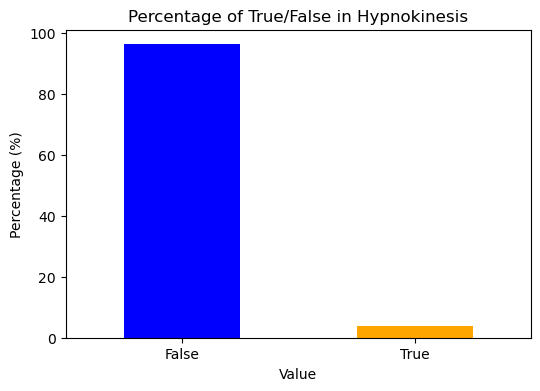

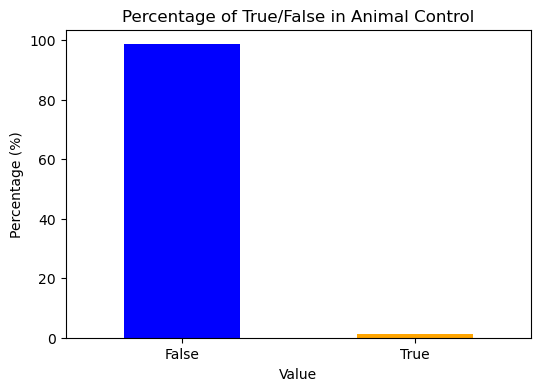

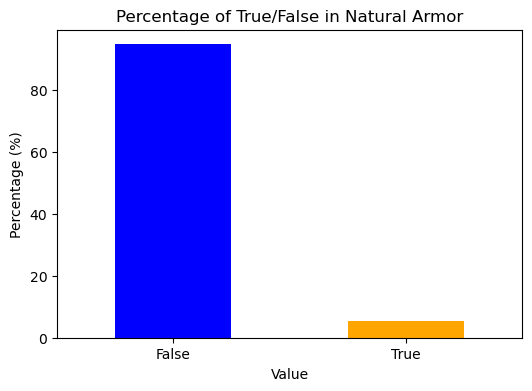

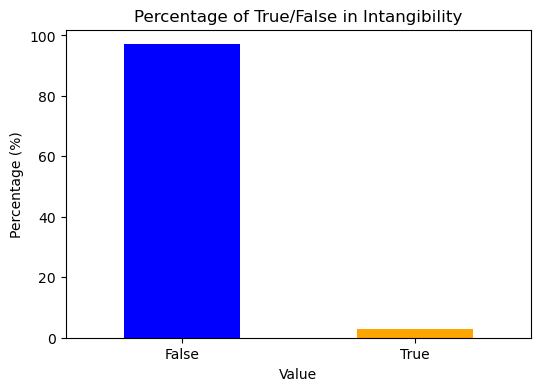

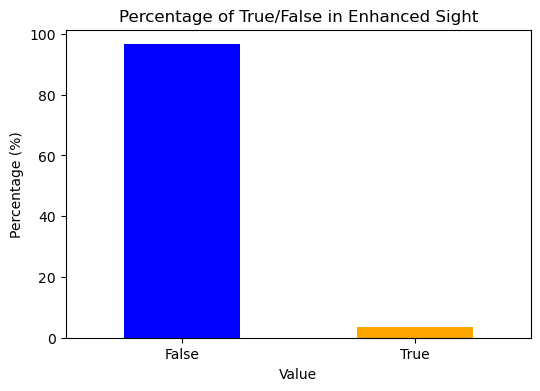

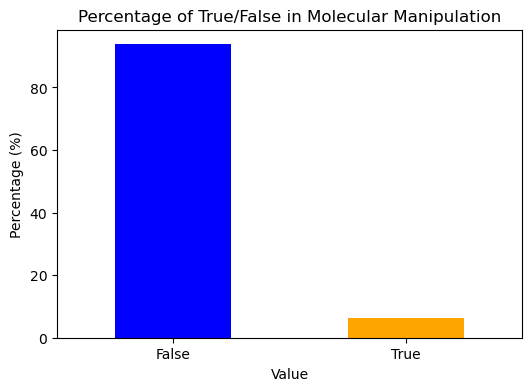

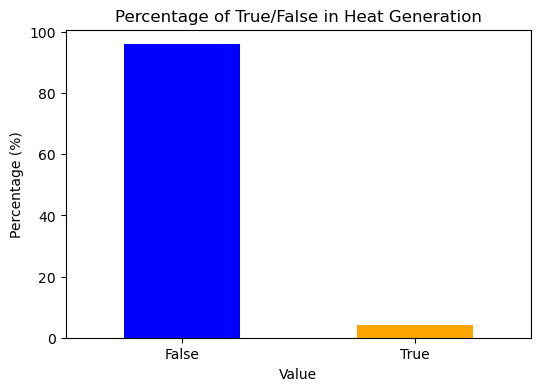

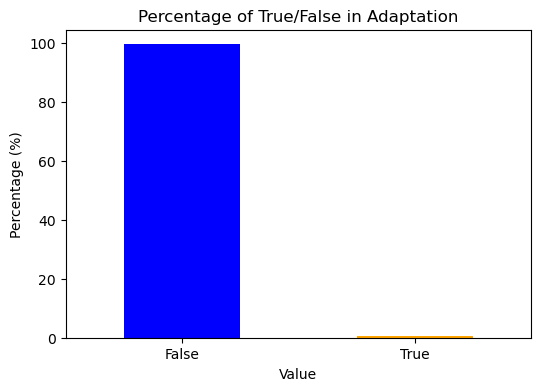

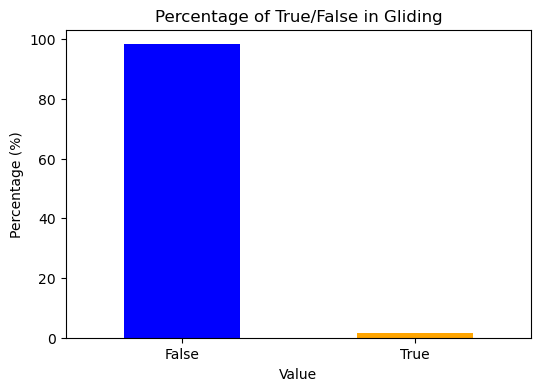

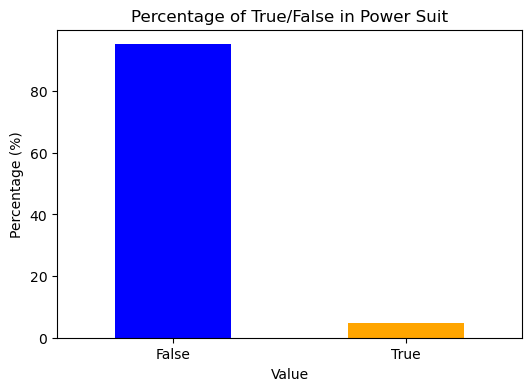

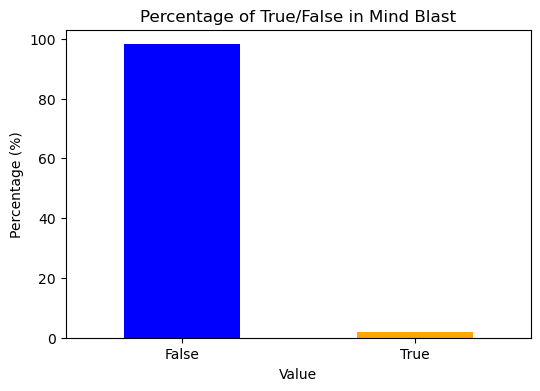

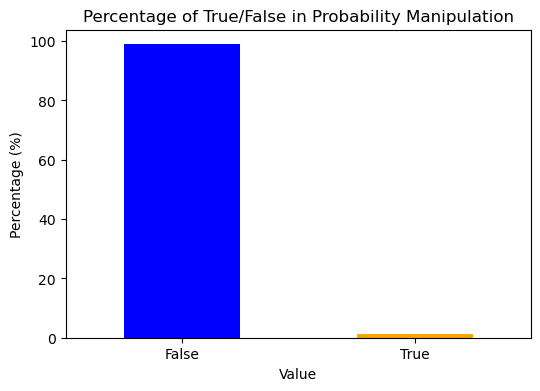

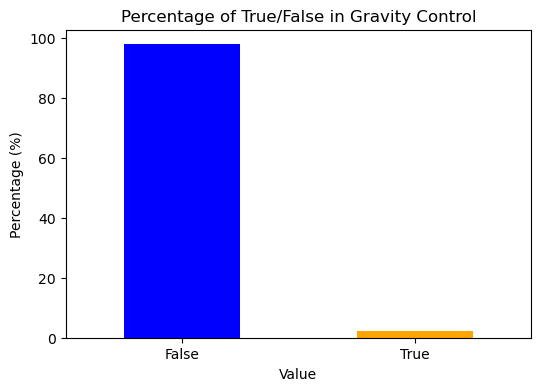

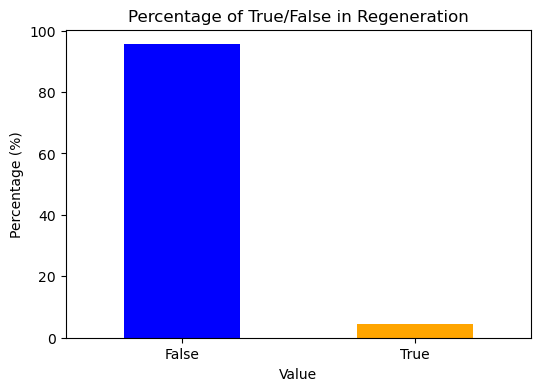

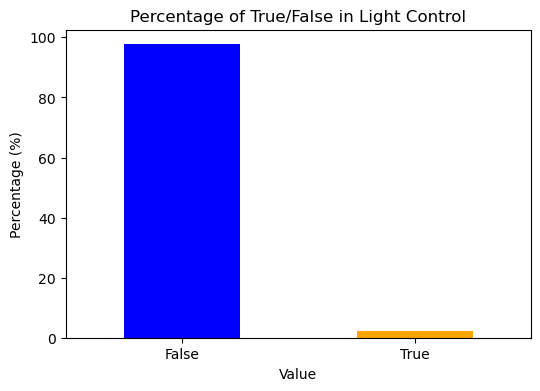

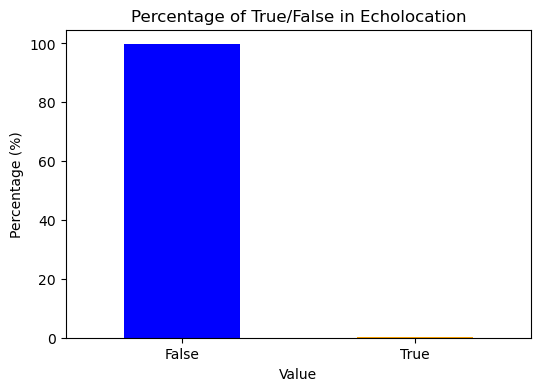

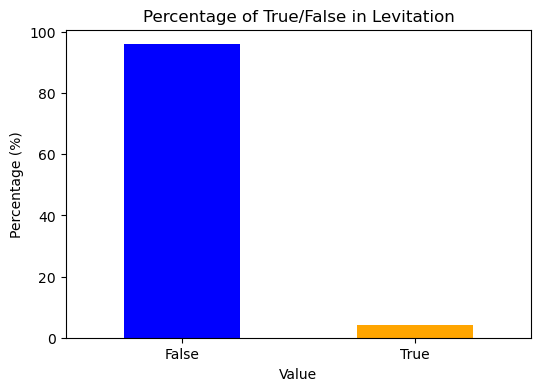

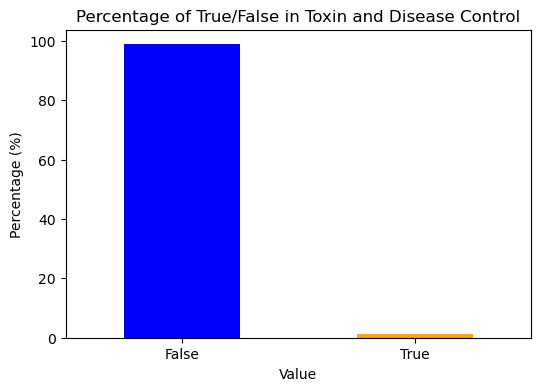

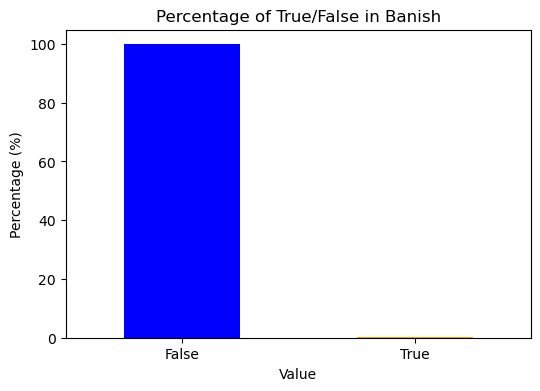

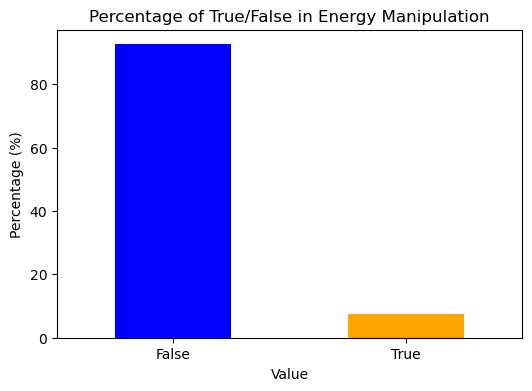

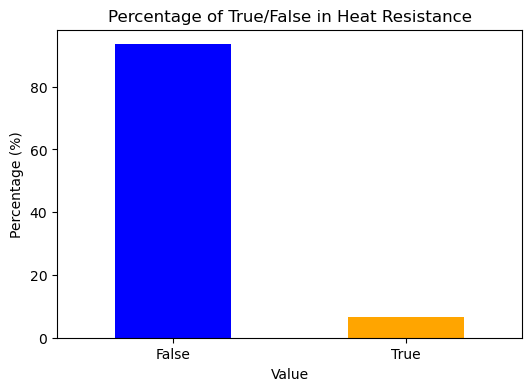

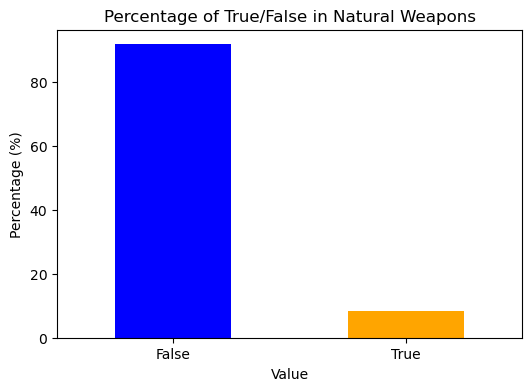

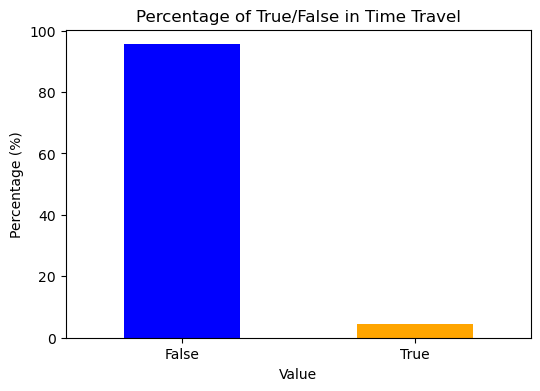

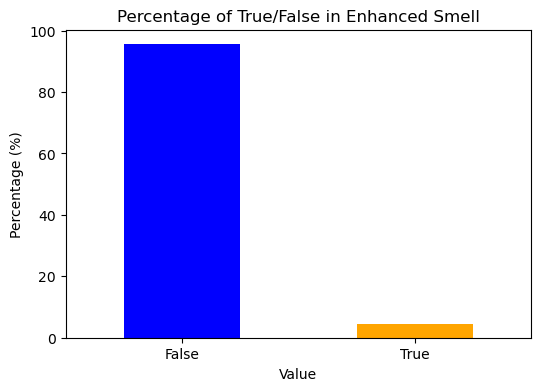

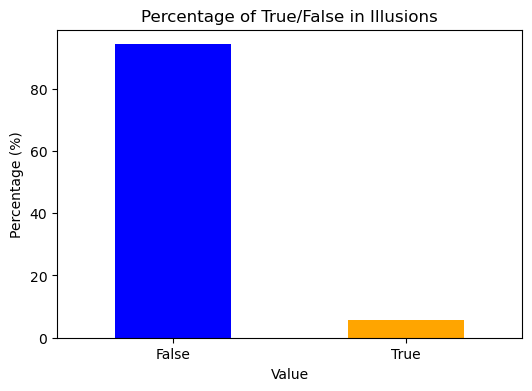

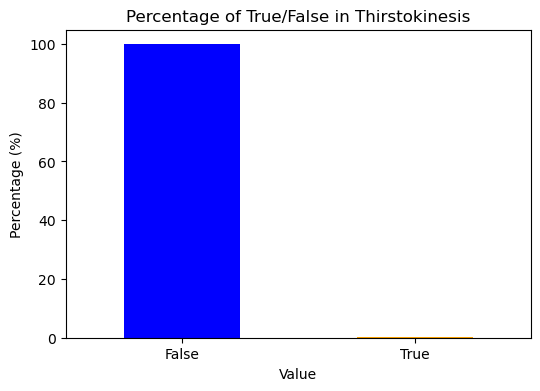

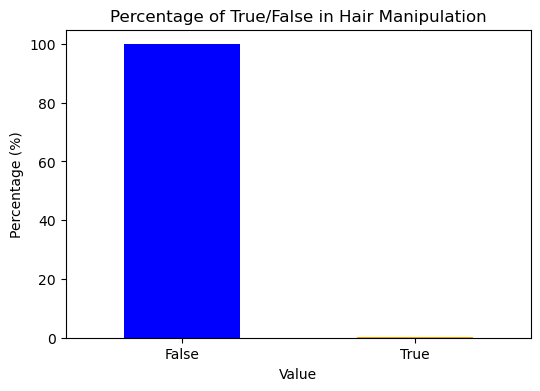

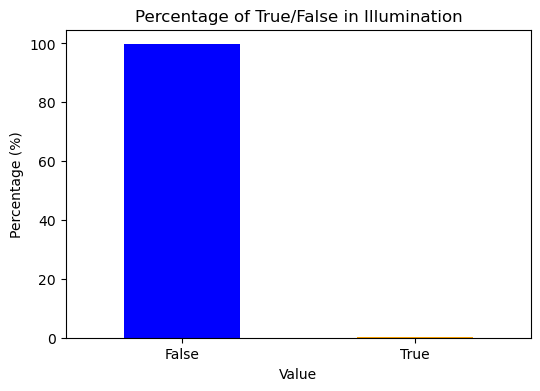

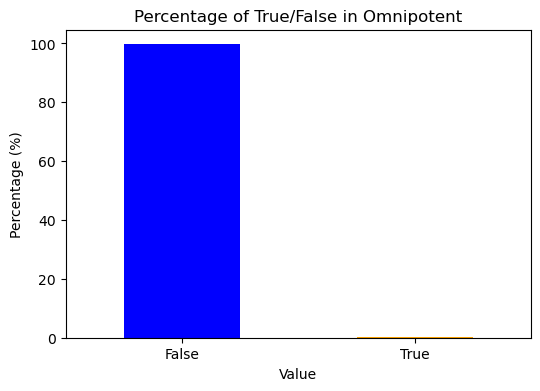

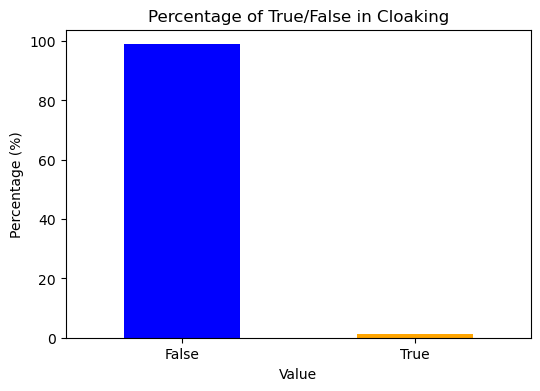

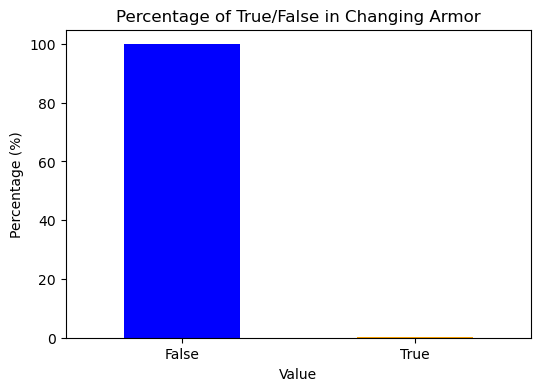

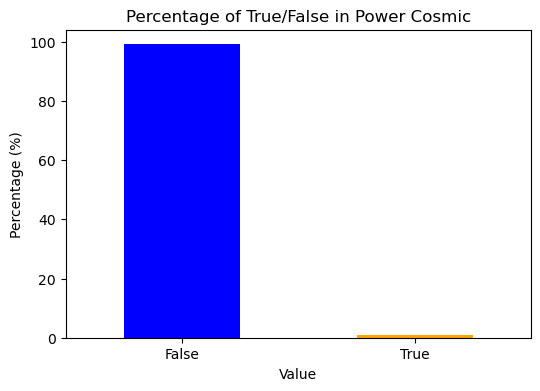

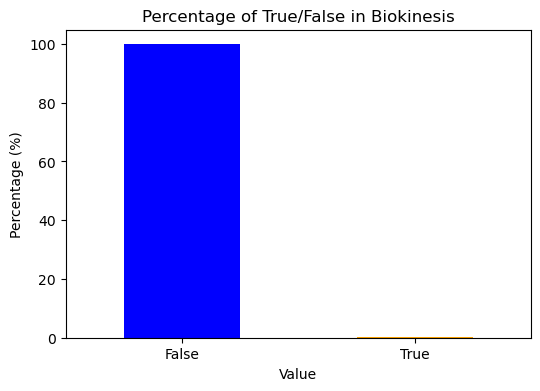

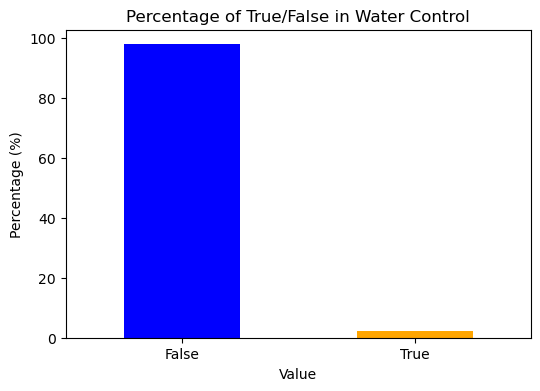

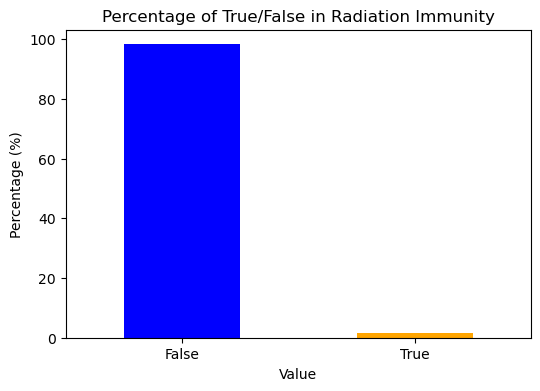

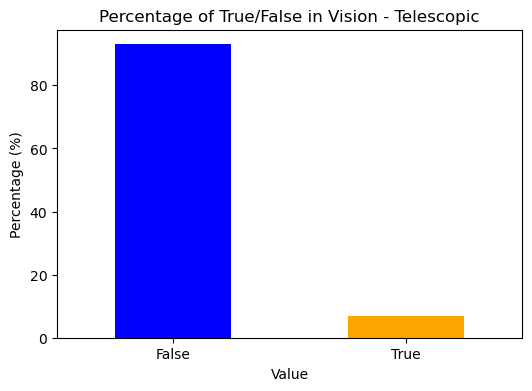

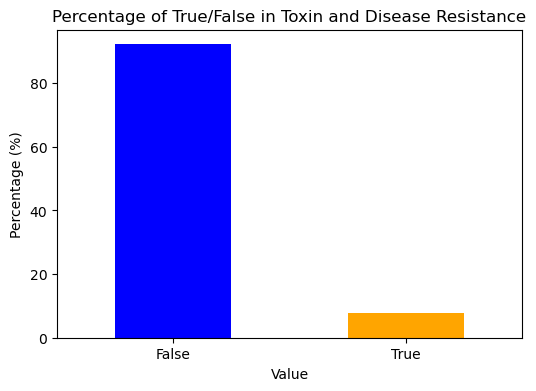

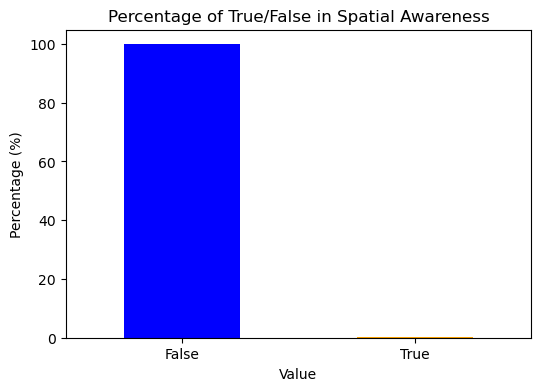

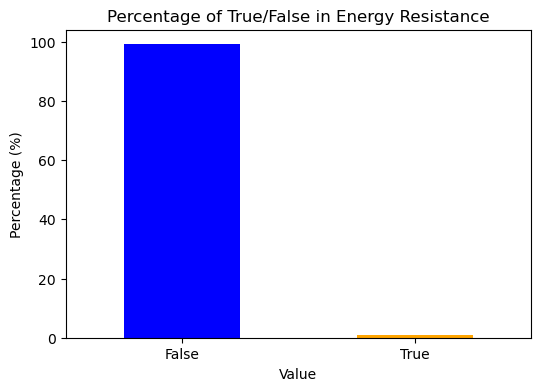

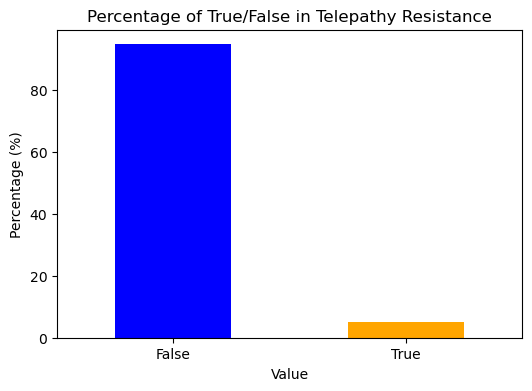

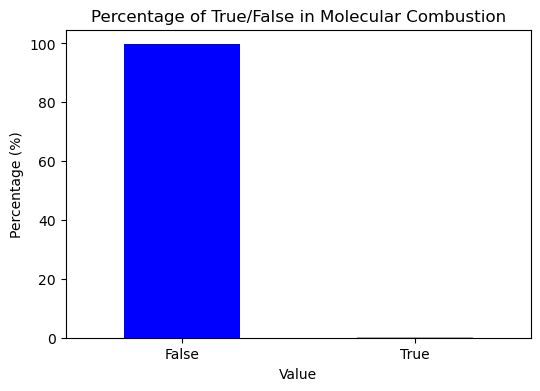

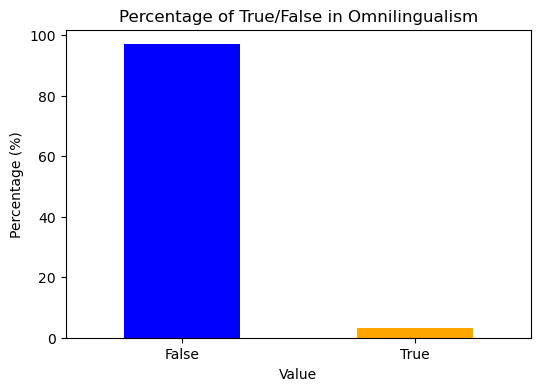

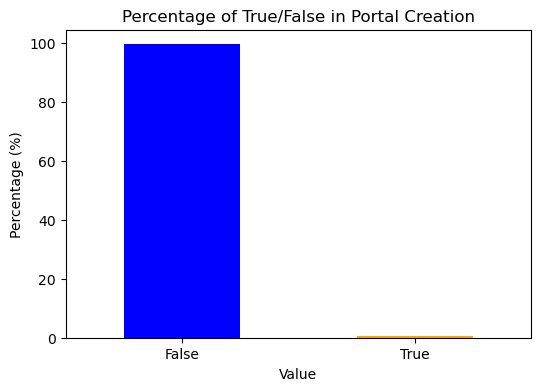

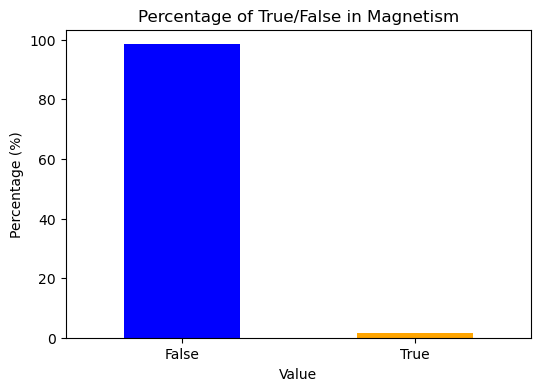

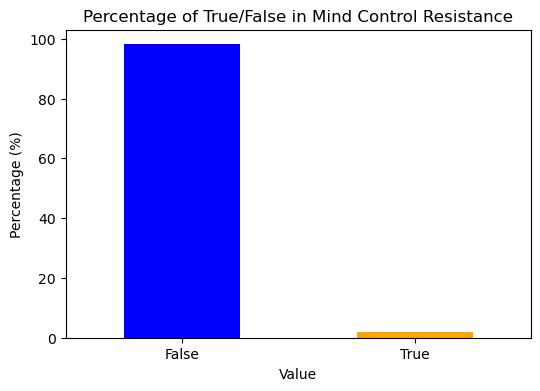

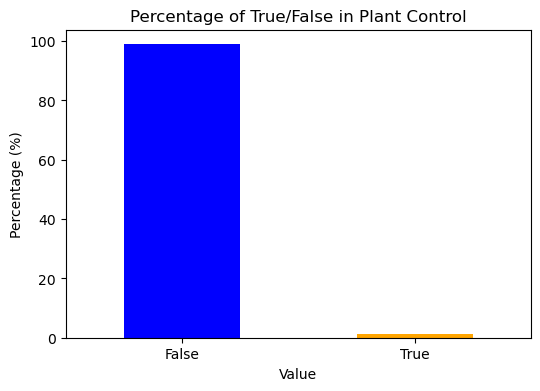

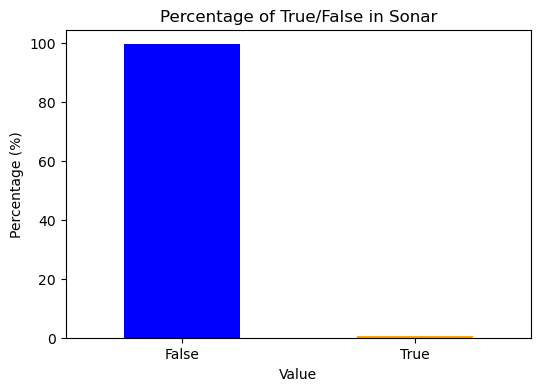

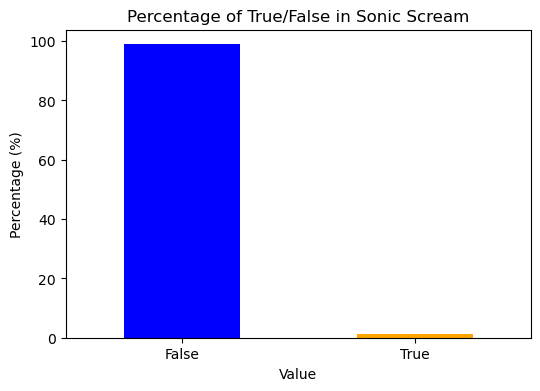

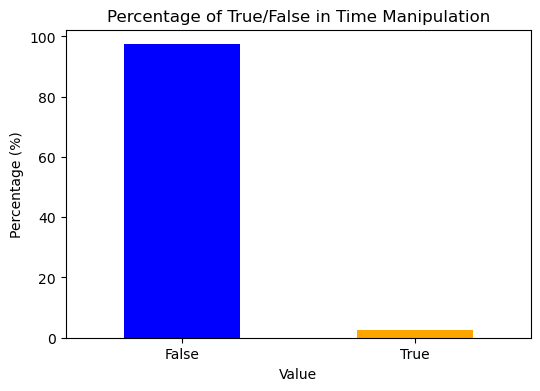

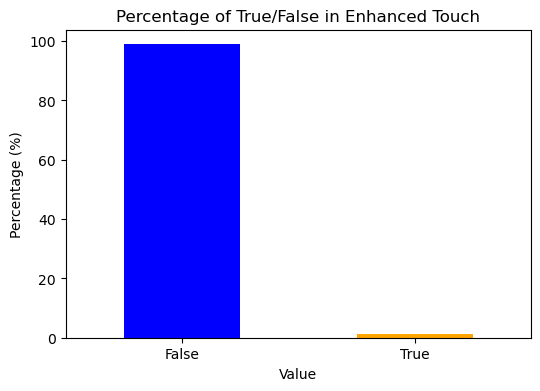

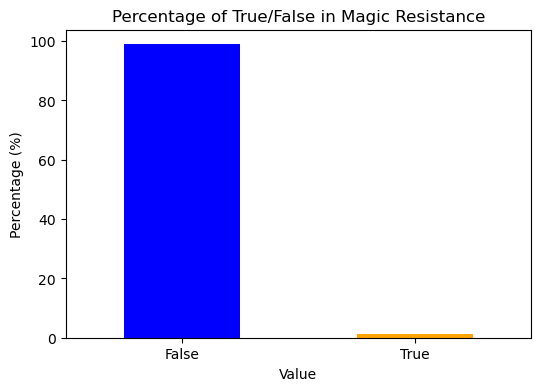

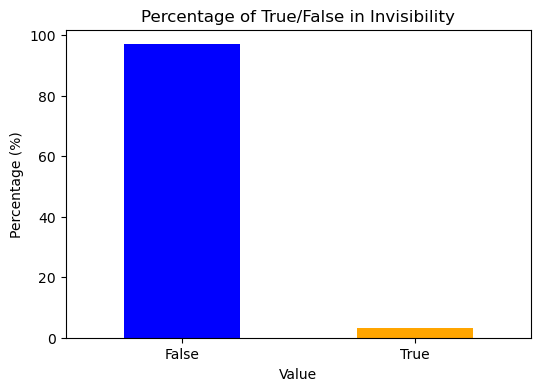

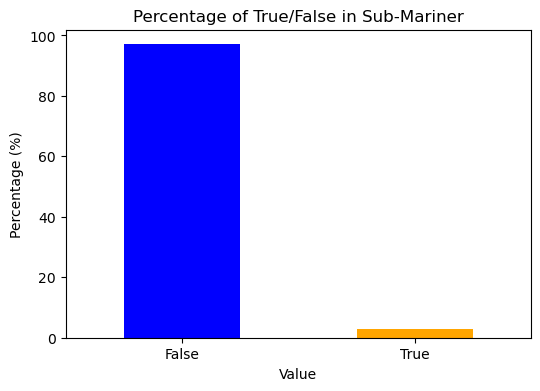

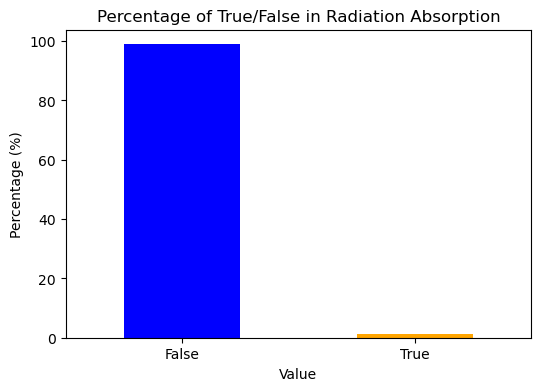

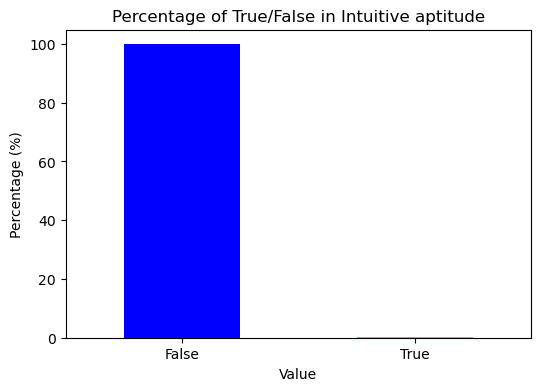

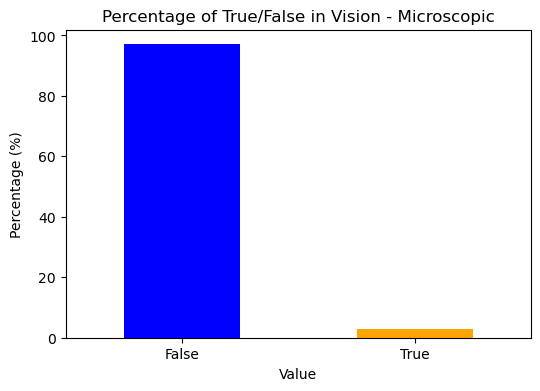

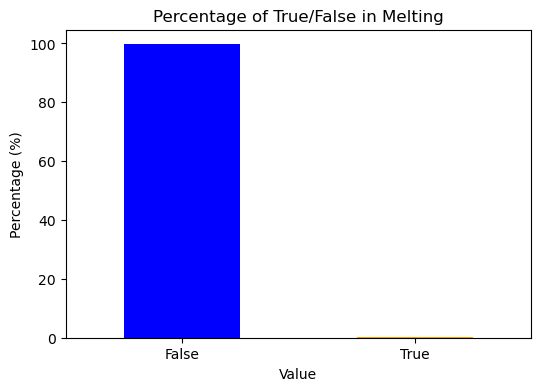

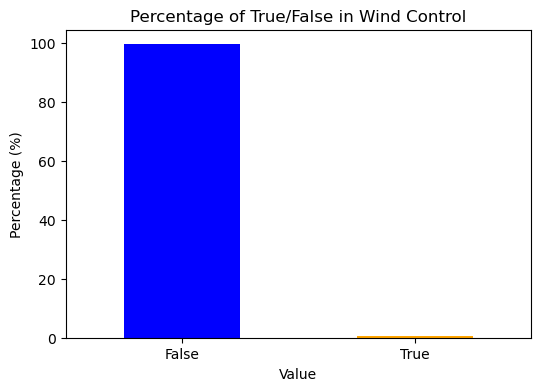

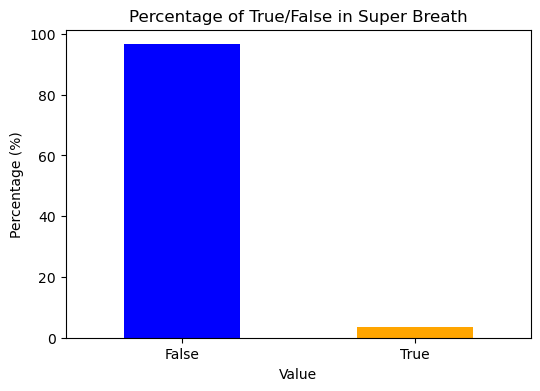

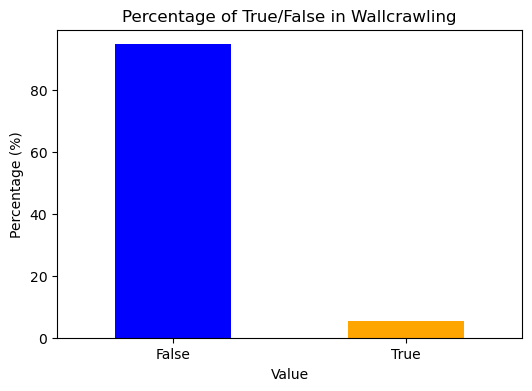

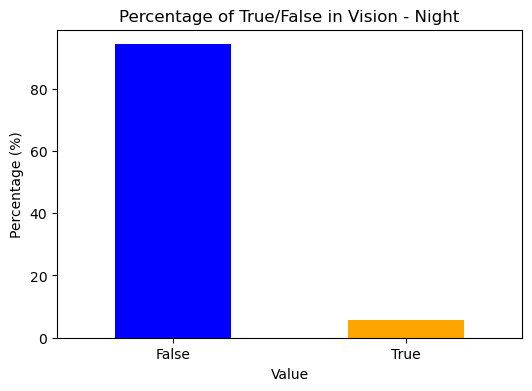

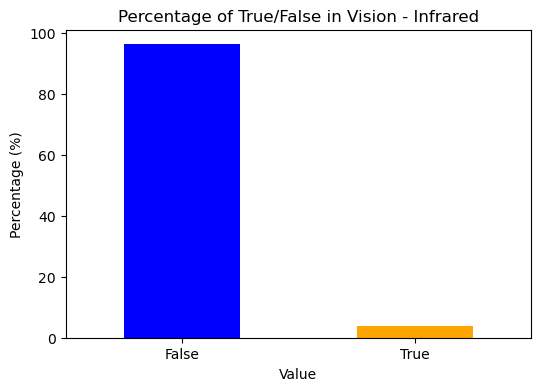

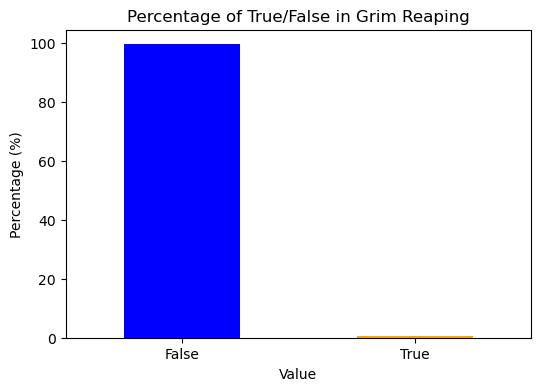

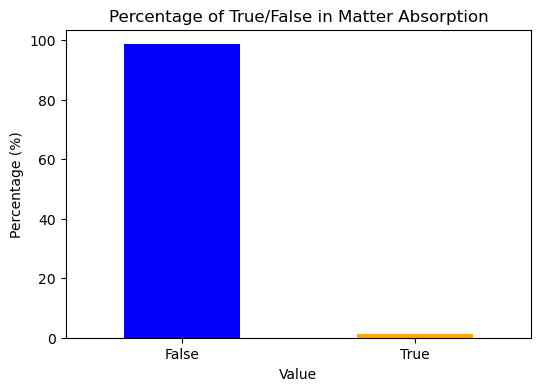

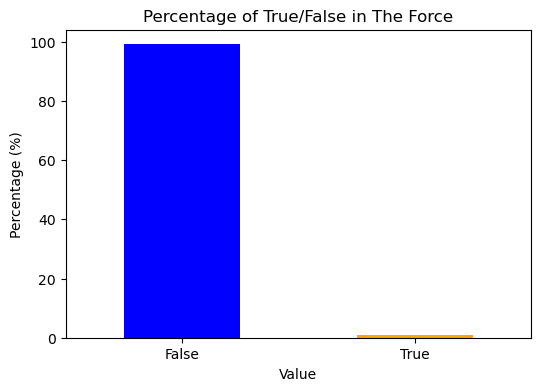

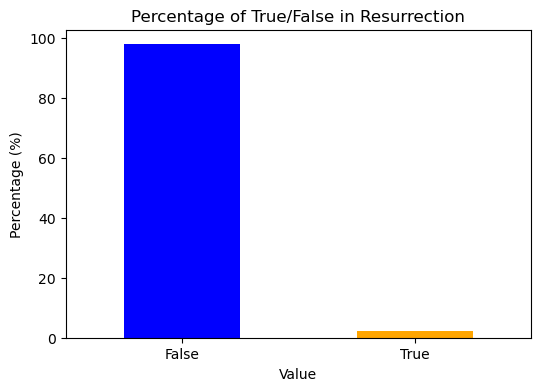

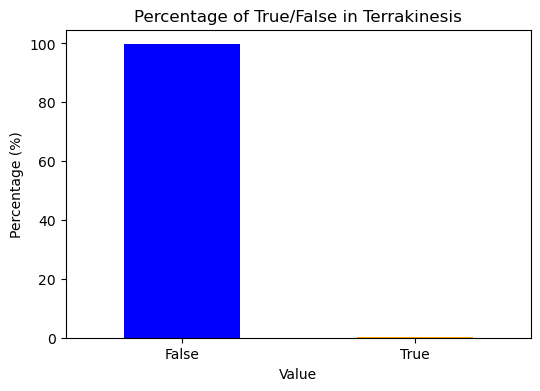

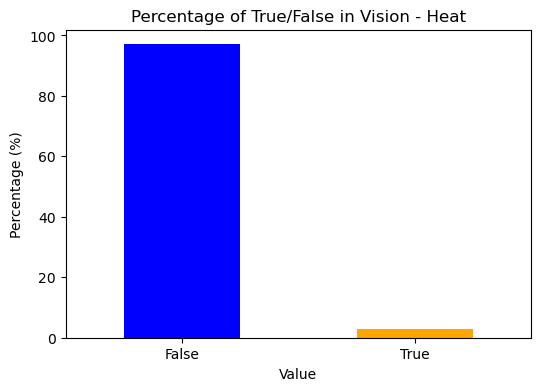

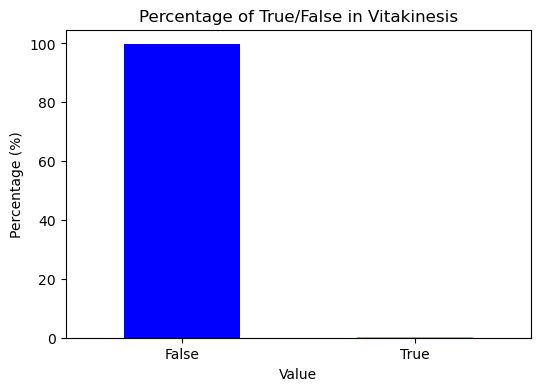

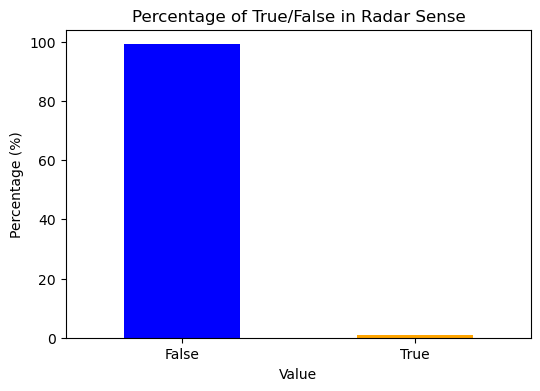

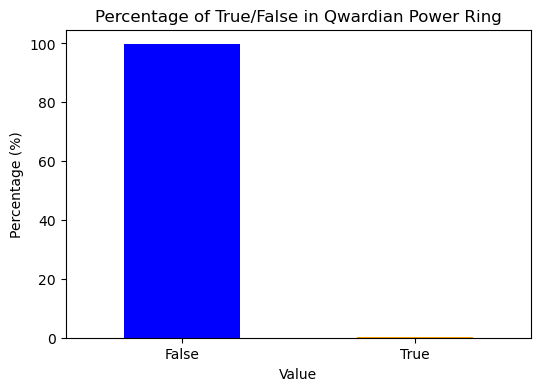

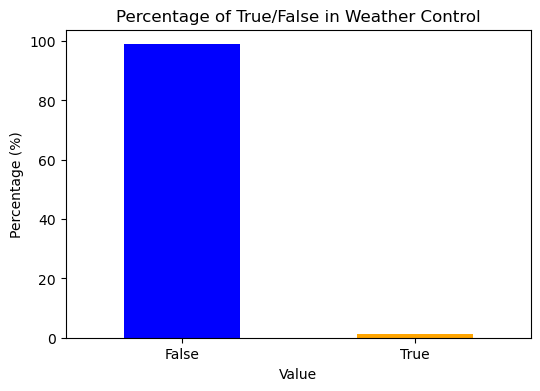

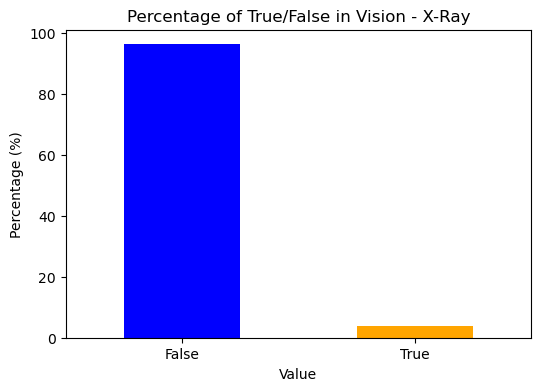

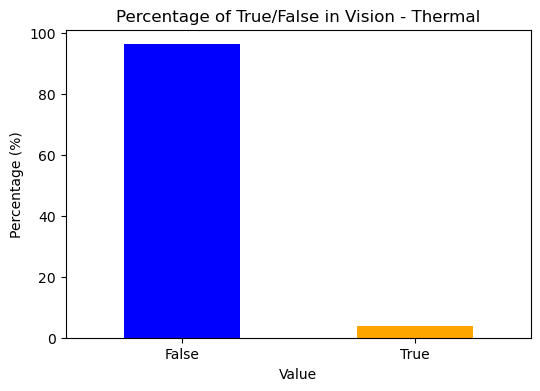

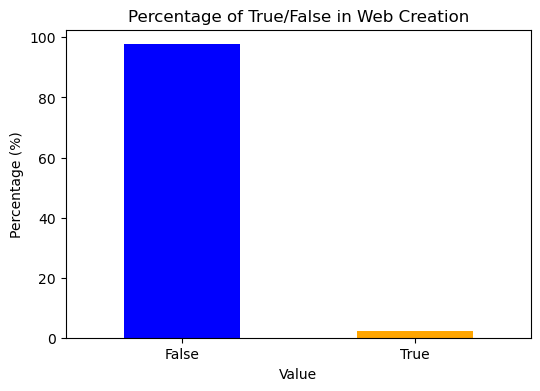

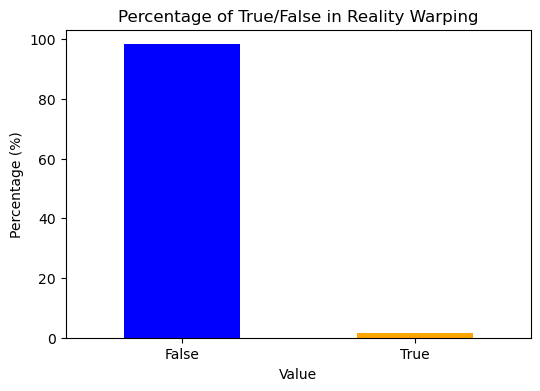

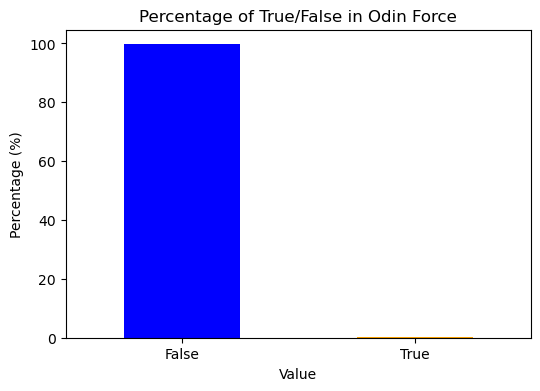

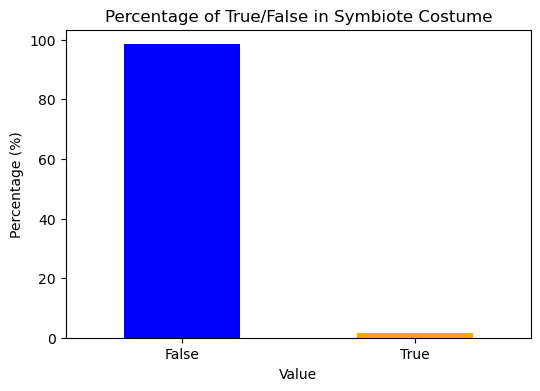

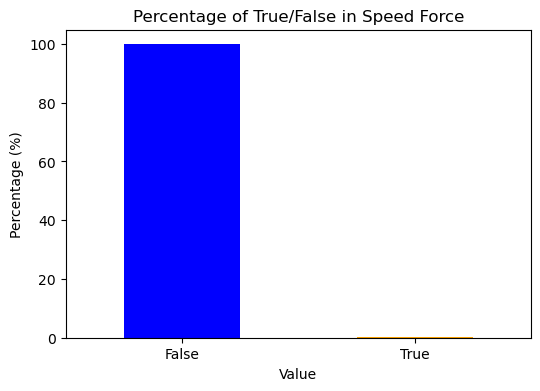

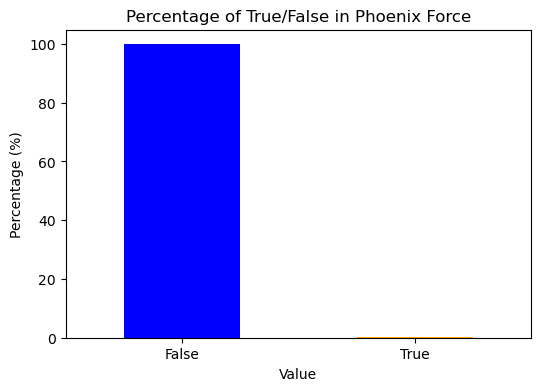

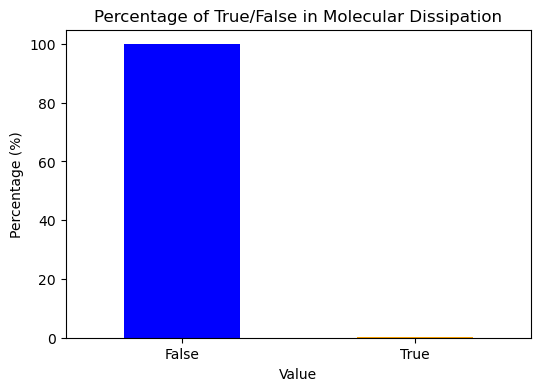

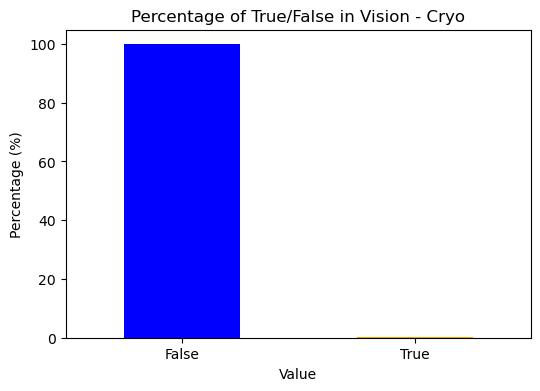

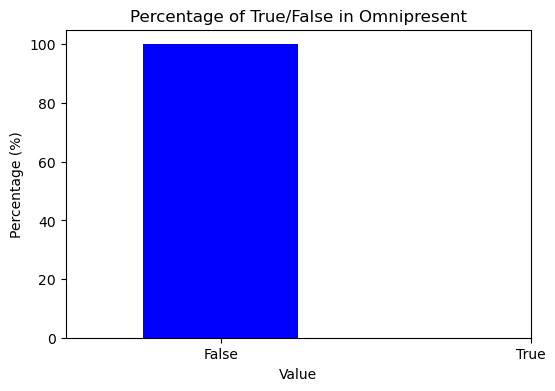

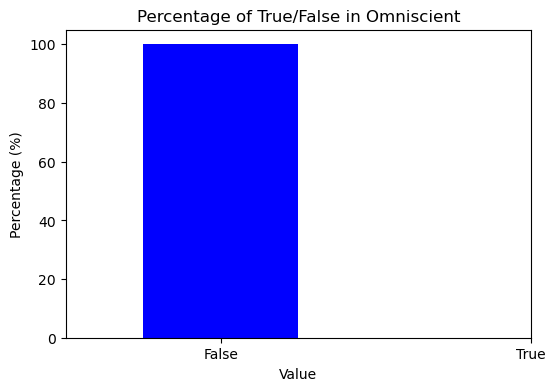

In [24]:
# Identify boolean columns in the DataFrame
boolean_columns = df_EDA.select_dtypes(include=['bool']).columns

# Plotting percentages of True and False for each boolean variable
for column in boolean_columns[1:3]:
    # Calculate the percentage of True/False
    percent = df[column].value_counts(normalize=True) * 100
    # Create a bar plot
    plt.figure(figsize=(6, 4))
    percent.plot(kind='bar', color=['blue', 'orange'])
    # Set title and labels
    plt.title(f'Percentage of True/False in {column}')
    plt.xlabel('Value')
    plt.ylabel('Percentage (%)')
    plt.xticks([0, 1], ['False', 'True'], rotation=0)  # Set x-tick labels to show True/False
    # Show plot
    plt.show()

The general trend of the graphs shows that most of the superpowers have False as the dominant category, since not all superheroes have every superpower, which is expected

# Model Creation

In [25]:
# Import the necessary library for train-test split

from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop(columns=['Gender'])
y = df['Gender']

# Perform one-hot encoding on the categorical features and drop NAs
X.dropna()
y.dropna()
X= pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The data is prepared, and we proceed by constructing a grid search to evaluate various models and hyperparameters.

Since the dataset has only two numerical variables, we try to explore two major aspects of the data
1. Their distrubution - using violin plots as they combine the information of both boxplots and histograms
2. Their relationship with each other - to check if there is any trend we can identify that differentiates between male and female genders

In [26]:
# Import the necessary library for the MLP classifier and GridSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier # The neural network model

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],  
    # This determines the number of neurons in each hidden layer. 
    # For example, (50, 50, 50) means there are three hidden layers, each with 50 neurons.
    
    'activation': ['tanh', 'relu'],  
    # This decides which activation function to use for the hidden layers. 
    # 'tanh' is like a curved line and 'relu' is like a line that goes straight after zero.

    'solver': ['sgd', 'adam'],  
    # This is the type of method the computer uses to find the best values for our model.
    # 'sgd' is like doing lots of small steps down a hill and 'adam' is like using a more clever way to do those steps.

    'alpha': [0.0001, 0.05],  
    # This is a value that helps us prevent our model from being too focused on the training data and not generalizing well to new data.

    'learning_rate': ['constant','adaptive'],  
    # This decides how fast or slow our model learns from the data.
    # 'constant' means it learns at the same speed all the time, and 'adaptive' means it changes its learning speed if it needs to.
}


# Initialize the MLP classifier
mlp = MLPClassifier(max_iter=100)

# Initialize the GridSearchCV object
grid = GridSearchCV(mlp, param_grid, cv=2, scoring='accuracy', return_train_score=True)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

/Users/joansr06/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joansr06/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joansr06/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joansr06/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
 

GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Get the best parameters of our model in the grid
best_params = grid.best_params_
best_params

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <h2 style="color: #333;">Best Hyperparameters for MLPClassifier</h2>
    <p><strong>Activation function for hidden layers:</strong> <code>Hyperbolic tangent (tanh)</code></p>
    <p><strong>L2 regularization parameter:</strong> <code>0.0001</code></p>
    <p><strong>Number of neurons in hidden layers:</strong> <code>One hidden layer with 100 neurons</code></p>
    <p><strong>Learning rate strategy:</strong> <code>Constant</code></p>
    <p><strong>Optimization algorithm:</strong> <code>Adaptive Moment Estimation (Adam)</code></p>
</div>


In [ ]:
# Get the best results of our model in the grid
results = pd.DataFrame(grid.cv_results_)
best_results = results[results['params'] == best_params]

# Print the training, validation, and test scores
print('Training score', best_results['mean_train_score'])
print('Validation score', best_results['mean_test_score'])
print('Test score', grid.score(X_test, y_test))

Training score 9    0.904487
Name: mean_train_score, dtype: float64
Validation score 9    0.842101
Name: mean_test_score, dtype: float64
Test score 0.8062015503875969


<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <h2 style="color: #333;">Model Performance Summary</h2>
    <p><strong>Training Score:</strong> <code>0.904487</code></p>
    <p><strong>Validation Score:</strong> <code>0.842101</code></p>
    <p><strong>Test Score:</strong> <code>0.8062015503875969</code></p>
    <p>Despite the differences, the training score of 90.45%, validation score of 84.21%, and test score of 80.62% are indicative of strong model performance, showcasing its ability to generalize well to unseen data.</p>
</div>

This next step is only exploratory to get to know what were the top models trained by the gridsearch and get to compare their training scores with their validation scores.

If we would want to use another model, with the params value we would simply get the parameters for the desired model.

In [ ]:
results[['mean_train_score', 'mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False).head(5)

mean_train_score  mean_test_score  \
9           0.904487         0.842101   
11          0.896674         0.838195   
23          0.892776         0.838179   
26          0.840102         0.838157   
20          0.845969         0.838149   

                                               params  
9   {'activation': 'tanh', 'alpha': 0.0001, 'hidde...  
11  {'activation': 'tanh', 'alpha': 0.0001, 'hidde...  
23  {'activation': 'tanh', 'alpha': 0.05, 'hidden_...  
26  {'activation': 'relu', 'alpha': 0.0001, 'hidde...  
20  {'activation': 'tanh', 'alpha': 0.05, 'hidden_...

In [ ]:
# Check the precision and recall of the model
from sklearn.metrics import classification_report

# Get the predictions of the model

y_pred = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Female       0.81      0.51      0.63        41
        Male       0.81      0.94      0.87        88

    accuracy                           0.81       129
   macro avg       0.81      0.73      0.75       129
weighted avg       0.81      0.81      0.79       129



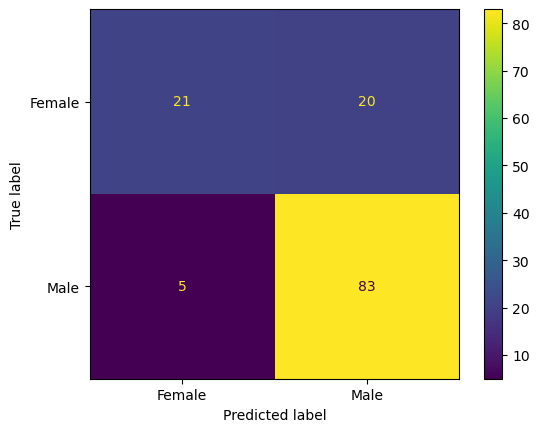

In [ ]:
# Import the necessary libraries for confusion matrix and display

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Predict the test data

y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

#make a pipeline with the best parameters
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('mlp', MLPClassifier(**best_params))
])
pipe.fit(X_train, y_train)

categorical_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

# Create a LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, 
                                 feature_names=X_train.columns, 
                                 class_names=['Male', 'Female'], 
                                 categorical_features=categorical_features,
                                 verbose=True, 
                                 mode='classification')

# Get the instance in the test set for which we want to explain the model's decision
i = 30
exp = explainer.explain_instance(X_test.values[i], pipe.predict_proba, num_features=10)

# Get the prediction probabilities
prediction_probabilities = pipe.predict_proba(X_test.values[i].reshape(1, -1))
print('Prediction probabilities:', prediction_probabilities)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

/Users/joansr06/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joansr06/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Intercept -0.972863933553196
Prediction_local [0.83589335]
Right: 0.9853101515959151
Prediction probabilities: [[0.01468985 0.98531015]]


/Users/joansr06/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <h2 style="color: #333;">CONCLUSION</h2>
    <p>The Lime analysis can give us in-depth information on the prediction for any specific character. For example, if we want to know the giveaway features that resulted in an accurate prediction or inversely, the features that influenced an erroneous prediction, we can use Lime.</p>
    <p>For example, we selected number 30 who is a female. Not only does this show us the most important features that were used in the prediction, but we can also see the result of this feature that led to the prediction. For number 30, the fact that <code>Race_Zen_Whoberian</code> is zero, gives us a lot of information.</p>
</div>

<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <p>Our model metrics are unexpectedly high. A model training score of <strong>90%</strong> and validation score of <strong>84%</strong> shows that the model is still able to predict with high accuracy, the gender of a character. For generalization purposes, we also calculated the generalization score on the test set and got a promising <strong>80%</strong>.</p>
    <p>This means we still have a long road to go in diversity and gender neutrality of roles when it comes to superheroes.</p>
    <p>In order to complement our experiment, we recommend creating a similar machine learning model with a capped date of creation (for example, characters created before 2015) and compare metrics to quantify the progress of inclusion.</p>
</div>

